Kim, M. J., Pertsch, K., Karamcheti, S., Xiao, T., Balakrishna, A., Nair, S., ... & Finn, C. (2024). [OpenVLA: An Open-Source Vision-Language-Action Model](https://arxiv.org/abs/2406.09246). arXiv preprint arXiv:2406.09246.

<span id='fig.1'></span>
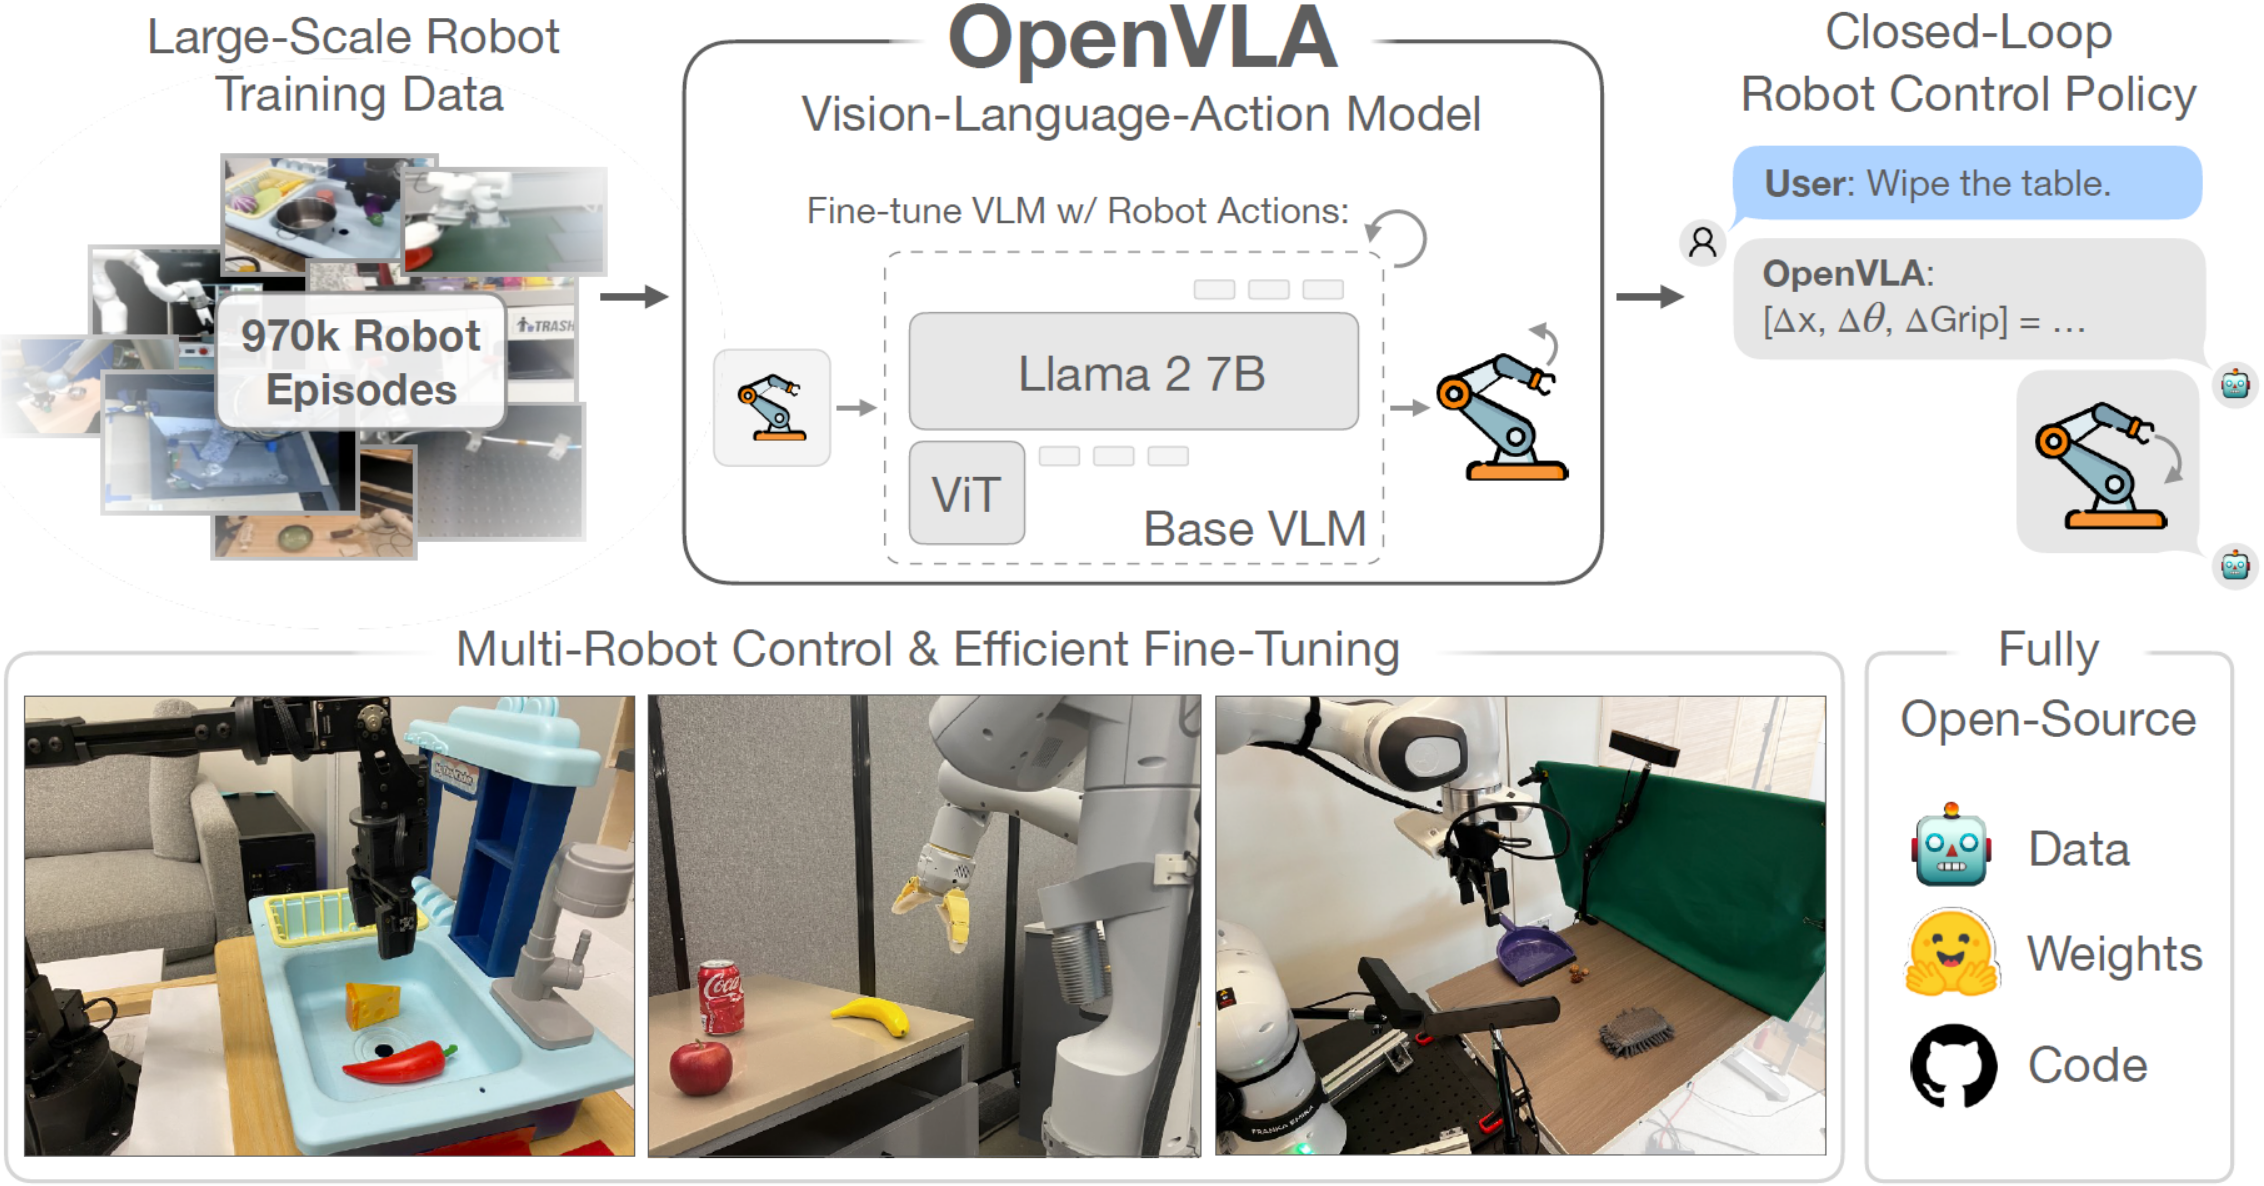
<!-- Figure 1: We present OpenVLA, a 7B-parameter open-source vision-language-action model (VLA), trained on 970k robot episodes from the Open X-Embodiment dataset [1]. OpenVLA sets a new state of the art for generalist robot manipulation policies. It supports controlling multiple robots out of the box and can be quickly adapted to new robot domains via parameter-efficient fine-tuning. The OpenVLA checkpoints and PyTorch training pipeline are fully open-source and models can be downloaded and fine-tuned from HuggingFace. -->
图1: 我们提出了 OpenVLA, 一个 7B 参数的开源视觉-语言-动作模型 (VLA), 在 Open X-Embodiment 数据集 [1] 的 970k 机器人场景上进行训练。OpenVLA 为通用机器人操作策略树立了新标杆。它支持开箱即用地控制多个机器人, 并且可以通过参数高效的微调快速适应新的机器人领域。OpenVLA 检查点和 PyTorch 训练流水线是完全开源的, 可以从 HuggingFace 下载并微调模型。

**Abstract**
<!-- Large policies pretrained on a combination of Internet-scale vision-language data and diverse robot demonstrations have the potential to change how we teach robots new skills: rather than training new behaviors from scratch, we can fine-tune such vision-language-action (VLA) models to obtain robust, generalizable policies for visuomotor control. Yet, widespread adoption of VLAs for robotics has been challenging as 1) existing VLAs are largely closed and inaccessible to the public, and 2) prior work fails to explore methods for efficiently fine-tuning VLAs for new tasks, a key component for adoption. Addressing these challenges, we introduce OpenVLA, a 7B-parameter open-source VLA trained on a diverse collection of 970k real-world robot demonstrations. OpenVLA builds on a Llama 2 language model combined with a visual encoder that fuses pretrained features from DINOv2 and SigLIP. As a product of the added data diversity and new model components, OpenVLA demonstrates strong results for generalist manipulation, outperforming closed models such as RT-2-X (55B) by 16.5% in absolute task success rate across 29 tasks and multiple robot embodiments, with 7x fewer parameters. We further show that we can effectively fine-tune OpenVLA for new settings, with especially strong generalization results in multi-task environments involving multiple objects and strong language grounding abilities, and outperform expressive from-scratch imitation learning methods such as Diffusion Policy by 20.4%. We also explore compute efficiency; as a separate contribution, we show that OpenVLA can be fine-tuned on consumer GPUs via modern low-rank adaptation methods and served efficiently via quantization without a hit to downstream success rate. Finally, we release model checkpoints, fine-tuning notebooks, and our PyTorch codebase with built-in support for training VLAs at scale on Open X-Embodiment datasets. -->
在互联网规模的视觉-语言数据和多样化机器人演示的组合上预训练的大型策略, 有潜力改变我们教授机器人新技能的方式: 我们可以微调这种视觉-语言-动作 (VLA) 模型, 以获得鲁棒、可泛化的视觉运动控制策略, 而不是从头开始训练新行为。然而, 将 VLA 广泛用于机器人一直具有挑战性, 因为: 1) 现有的 VLA 大多是封闭的, 不向公众开放, 2) 先前的工作未能探索有效微调 VLAs 的方法, 用于新任务, 这是采用的关键组件。为应对这些挑战, 我们提出 OpenVLA, 一个 7B 参数的开源 VLA, 它在 970k 个现实世界机器人演示的多样化集合上进行训练。OpenVLA 建立在 Llama 2 语言模型上, 结合了一个视觉编码器, 该视觉编码器融合了来自 DINOv2 和 SigLIP 的预训练特征。作为增加数据多样性和新的模型组件的产物, OpenVLA 在通用操作方面展现处强有力的结果, 在 29 项任务和多个机器人实例中的绝对任务成功率方面, 比 RT-2-X (55B) 等封闭模型高 16.5%, 参数减少 7 倍。我们进一步表明, 我们可以有效地微调 OpenVLA 用于新配置, 在多任务环境(包含多对象和强大的语言基础能力)中获得特别强大的泛化结果, 并且比富有表现力的从头开始的模仿学习方法(例如 Diffusion Policy)高 20.4%。我们还探索了计算效率; 作为一项单独的贡献, 我们表明 OpenVLA 可以通过流行的低秩自适应方法在消费者 GPUs 上进行微调, 并通过量化高效地提供服务, 而不会影响下游成功率。最后，我们发布了模型检查点、微调笔记和我们的 PyTorch 代码库, 内置支持在 Open X-Embodiment 数据集上大规模训练 VLAs。


# Introduction
<!-- A key weakness of learned policies for robotic manipulation is their inability to generalize beyond their training data: while existing policies trained for individual skills or language instructions have the capacity to extrapolate behaviors to new initial conditions such as object positions or lighting [2, 3], they lack robustness to scene distractors or novel objects [4, 5] and struggle to execute unseen task instructions [6, 7]. Yet beyond robotics, existing foundation models for vision and language such as CLIP [8], SigLIP [9], and Llama 2 [10] are capable of these types of generalization and more, stemming from the priors captured by their Internet-scale pretraining datasets. While reproducing this scale of pretraining for robotics is still an open challenge — even the largest robot manipulation datasets [1, 11] only have 100K to 1M examples – this imbalance suggests an opportunity: using existing foundation models for vision and language as a core building block for training robotic policies that can generalize to objects, scenes, and tasks beyond their training data. -->
&emsp;&emsp;机器人操作学习策略的一个关键弱点是无法在训练数据之外进行泛化: 尽管现有策略(被训练用于个别技能或语言指令)能够将行为推断到新的初始条件(例如物体位置或光照 [2, 3]), 但它们对场景干扰物或新物体缺乏鲁棒性 [4, 5], 并且难以执行未见过的任务指令 [6, 7]。然而, 除了机器人技术之外, 现有的视觉和语言基础模型(如 CLIP [8]、SigLIP [9] 和 Llama 2 [10])能够实现这些类型的泛化, 甚至更多, 源于其互联网规模预训练数据集捕获的先验。虽然复现这种规模的预训练用于机器人仍然是一个开放的挑战——即使最大的机器人操作数据集 [1, 11] 也只有 100K 到 1M 示例——但这种不平衡意味着机会: 使用现有的视觉和语言基础模型作为训练机器人策略的核心构建块, 这些策略可以泛化到训练数据之外的对象、场景和任务。

<!-- Towards this goal, existing work has explored integrating pretrained language and vision-language models for robotic representation learning [12–14] and as a component in modular systems for task planning and execution [15, 16]. More recently, they have been used for directly learning vision-language-action models [VLAs; 1, 7, 17, 18] for control. VLAs provide a direct instantiation of using pretrained vision-and-language foundation models for robotics, directly fine-tuning visually-conditioned language models (VLMs) such as PaLI [19, 20] to generate robot control actions. By building off of strong foundation models trained on Internet-scale data, VLAs such as RT-2 [7] demonstrate impressive robustness results, as well as an ability to generalize to novel objects and tasks, setting a new standard for generalist robot policies. Yet, there are two key reasons preventing the widespread use of existing VLAs: 1) current models [1, 7, 17, 18] are closed, with limited visibility into model architecture, training procedures, and data mixture, and 2) existing works do not provide best practices for deploying and adapting VLAs to new robots, environments, and tasks — especially on commodity hardware (e.g., consumer-grade GPUs). We argue that to develop a rich foundation for future research and development, robotics needs open-source, generalist VLAs that support effective fine-tuning and adaptation, akin to the existing ecosystem around open-source language models [21–24]. -->
&emsp;&emsp;为了这个目标, 现有的研究已经探索了集成预训练的语言和视觉-语言模型, 用于机器人表征学习 [12–14], 并作为模块化系统的组件, 用于任务规划和执行 [15, 16]。最近, 它们已被用于直接学习视觉-语言-动作模型 [VLAs; 1, 7, 17, 18], 用于控制。VLAs 为机器人提供了使用预训练的视觉和语言基础模型的直接实例, 直接微调视觉条件语言模型 (VLMs)(如 PaLI [19, 20]), 以生成机器人控制动作。通过建立(在互联网规模数据上训练过的)强大的基础模型, RT-2 [7] 等 VLAs 展示了令人印象深刻的鲁棒结果, 以及泛化到新对象和新任务的能力, 为通用机器人策略设定了新标准。然而, 有两个主要原因, 阻碍了现有 VLAs 的广泛使用: 1) 当前模型 [1, 7, 17, 18] 是封闭的, 对模型架构、训练程序和数据混合的有限可见性, 2) 现有工作没有提供最佳实践, 用于将 VLAs 部署并适应到新机器人、环境和任务——尤其是在商品硬件(例如消费级 GPU)上。我们认为, 为未来的研究和开发奠定坚实的基础, 机器人技术需要开源、通用的 VLAs, 其支持有效地微调和适配, 类似于围绕开源语言模型的现有生态系统 [21–24]。

<!-- To this end, we introduce OpenVLA, a 7B-parameter open-source VLA that establishes a new state of the art for generalist robot manipulation policies. OpenVLA consists of a pretrained visually-conditioned language model backbone that captures visual features at multiple granularities, fine-tuned on a large, diverse dataset of 970k robot manipulation trajectories from the Open-X Embodiment [1] dataset—a dataset that spans a wide range of robot embodiments, tasks, and scenes. As a product of increased data diversity and new model components, OpenVLA outperforms the 55B-parameter RT-2-X model [1, 7], the prior state-of-the-art VLA, by 16.5% absolute success rate across 29 evaluation tasks on the WidowX and Google Robot embodiments. We additionally investigate efficient fine-tuning strategies for VLAs, a new contribution not explored in prior work, across 7 diverse manipulation tasks spanning behaviors from object pick-and-place to cleaning a table. We find that fine-tuned OpenVLA policies clearly outperform fine-tuned pretrained policies such as Octo [5]. Compared to from-scratch imitation learning with diffusion policies [3], fine-tuned OpenVLA shows substantial improvement on tasks involving grounding language to behavior in multi-task settings with multiple objects. Following these results, we are the first to demonstrate the effectiveness of compute-efficient fine-tuning methods leveraging low-rank adaptation [LoRA; 26] and model quantization [27] to facilitate adapting OpenVLA models on consumer-grade GPUs instead of large server nodes without compromising performance. As a final contribution, we open-source all models, deployment and fine-tuning notebooks, and the OpenVLA codebase for training VLAs at scale, with the hope that these resources enable future work exploring and adapting VLAs for robotics. -->
&emsp;&emsp;为此，我们提出 OpenVLA, 一个 7B 参数的开源 VLA, 它为通用机器人操作策略树立了新高度。OpenVLA 包含一个经过预训练的视觉条件语言模型 backbone, 其捕获多粒度的视觉特征, 在(来自 Open-X Implementation [1] 数据集的大型、多样化的 970k 机器人操作轨迹数据集)上进行微调, 该数据集涵盖广泛的机器人具身、任务和场景。作为增加数据多样性和新模型组件的产物, OpenVLA 在 WidowX 和 Google Robot 实施例的 29 项评估任务中, 绝对成功率比 55B 参数 RT-2-X 模型 [1, 7] (之前最先进的 VLA) 高 16.5%。我们还研究了 VLAs 的有效微调策略, 一项在先前工作中未探索的新贡献, 跨越 7 种不同的操作任务, 涵盖从物体拾取和放置到清洁桌子的行为。我们发现微调的 OpenVLA 策略明显优于微调的预训练策略, 例如 Octo [5]。与从头开始的具有扩散策略的模仿学习 [3] 相比, 微调的 OpenVLA 在(包含在具有多个对象的多任务配置中从基础语言到行为的)任务上展现出显着的改进。根据这些结果, 我们首次展示了计算高效的微调方法的有效性, 该方法利用低秩自适应 [LoRA;26] 和模型量化 [27], 以便于在消费级 GPU 而不是大型服务器节点上适配 OpenVLA 模型, 而不影响性能。作为最后的贡献, 我们开源所有模型、部署和微调笔记, 以及用于大规模训练 VLA 的 OpenVLA 代码库, 希望这些资源能够支持未来工作, 探索和适配 VLAs 用于机器人技术。

# Related Work
<!-- **Visually-Conditioned Language Models** Visually-conditioned language models (VLMs), which are trained on Internet-scale data to generate natural language from input image(s) and language prompts, have been adopted for myriad applications from visual question answering [28–31] to object localization [32, 33]. One of the key advances fueling recent VLMs are model architectures that bridge features from pretrained vision encoders [8, 9, 25] with pretrained language models [10, 23, 34–36], directly building on advances in both computer vision and natural language modelling to create powerful multimodal models. While early work explored various architectures for cross-attending between vision and language features [37–41], new open-source VLMs [20, 42–44] have converged on a simpler "patch-as-token" approach, in which patch features from pretrained visual transformers are treated as tokens, and are then projected into the input space of a language model. This simplicity makes it easy to repurpose existing tools for training language models at scale for VLM training. We employ these tools in our work to scale VLA training, and specifically use VLMs from Karamcheti et al. [44] as our pretrained backbone, as they are trained from multi-resolution visual features, fusing low-level spatial information from DINOv2 [25] with higher-level semantics from SigLIP [9] to aid in visual generalization. -->
**视觉条件语言模型** 视觉条件语言模型 (VLMs), 这些模型在互联网规模数据上进行训练, 根据输入图像和语言提示生成自然语言, 已被用于从视觉问答 [28–31] 到对象定位 [32, 33] 等多种应用。推动最近 VLMs 进步的关键之一是模型架构, 该架构将预训练视觉编码器 [8, 9, 25] 的特征与预训练语言模型 [10, 23, 34–36] 联系起来, 建立在(计算机视觉和自然语言建模的)进步的基础上, 以创建强大的多模态模型。尽管早期研究探索了视觉和语言特征之间的交叉关注的各种架构 [37–41], 但是新开源的 VLMs [20, 42–44] 已经融合了一种更简单的"patch-as-token"方法, 其中来自预训练视觉 transformers 的 patch 特征被视为词元, 然后被投影到语言模型的输入空间。这种简单性使其轻松地将大规模训练语言模型的现有工具复用于 VLM 训练。我们在工作中采用这些工具来扩展 VLA 训练, 特别是使用 Karamcheti et al. [44] 的 VLMs 作为我们的预训练 backbone, 因为它们根据高分辨率视觉特征进行训练, 融合了来自 DINOv2 [25] 的下层空间信息和来自 SigLIP [9] 的上层语义, 以帮助视觉泛化。

<!-- **Generalist Robot Policies** A recent trend in robotics works towards training multi-task "generalist" robot policies [2, 6, 45–49] on large diverse robot datasets [1, 2, 6, 11, 45, 49–56], spanning many different robot embodiments [1, 5, 53, 57–66]. Notably, Octo [5] trains a generalist policy that can control multiple robots out-of-the-box and allows for flexible fine-tuning to new robot setups. A key difference between these approaches and OpenVLA is the model architecture. Prior works like Octo typically compose pretrained components such as language embeddings or visual encoders with additional model components initialized from scratch [2, 5, 6], learning to “stitch” them together during the course of policy training. Unlike these works, OpenVLA adopts a more end-to-end approach, directly fine-tuning VLMs to generate robot actions by treating them as tokens in the language model vocabulary. Our experimental evaluation shows that this simple yet scalable pipeline substantially boosts performance and generalization ability over prior generalist policies. -->
**通用机器人策略** 机器人技术的最新趋势是致力于在大型多样化机器人数据集 [1, 2, 6, 11, 45, 49–56] 上训练多任务"通用"机器人策略 [2, 6, 45–49], 跨越许多不同的机器人实施例 [1, 5, 53, 57–66]。值得注意的是, Octo [5] 训练一种通用策略, 它可以开箱即用地控制多个机器人, 并允许对新的机器人配置进行灵活微调。这些方法与 OpenVLA 之间的一个关键区别是模型架构。<font color="blue">(像 Octo 这样的)先前工作通常将预训练组件(例如语言嵌入或视觉编码器)与(从头开始初始化的)附加模型组件 [2、5、6] 组合起来, 在策略训练过程中学习将它们"拼接"在一起</font>。与这些工作不同, <font color="red">OpenVLA 采用一种更端到端的方法, 通过将动作视为语言模型词汇表中的词元, 直接微调 VLMs 以生成机器人动作</font>。我们的实验评估表明, 与之前的通用策略相比, 这种简单但可扩展的流水线大幅提高性能和泛化能力。

<!-- **Vision-Language-Action** Models A number of works have explored the use of VLMs for robotics, e.g., for visual state representations [12, 13], object detection [67], high-level planning [16], and for providing a feedback signal [68–71]. Others integrate VLMs directly into end-to-end visuomotor manipulation policies [14, 15], but incorporate significant structure into the policy architecture or require calibrated cameras, which limits their applicability. A number of recent works have explored similar recipes to ours and directly fine-tuned large pretrained VLMs for predicting robot actions [1, 7, 17, 18, 72]. Such models are often referred to as vision-language-action models (VLAs), since they fuse robot control actions directly into VLM backbones. This has three key benefits: (1) it performs alignment of pretrained vision and language components on a large, Internet-scale vision-language dataset, (2) the use of a generic architecture, not custom-made for robot control, allows us to leverage the scalable infrastructure underlying modern VLM training [73–75] and scale to training billion-parameter policies with minimal code modifications, and (3) it provides a direct pathway for robotics to benefit from the rapid improvements in VLMs. Existing works on VLAs either focus on training and evaluating in single robot or simulated setups [72, 76] and thus lack generality, or are closed and do not support efficient fine-tuning to new robot setups [1, 7, 17, 18]. Most closely related, RT-2-X [1] trains a 55B-parameter VLA policy on the Open X-Embodiment dataset and demonstrates state-of-the-art generalist manipulation policy performance. However, our work differs from RT-2-X in multiple important aspects: (1) by combining a strong open VLM backbone with a richer robot pretraining dataset, OpenVLA outperforms RT-2-X in our experiments while being an order of magnitude smaller; (2) we thoroughly investigate fine-tuning of OpenVLA models to new target setups, while RT-2-X does not investigate the fine-tuning setting; (3) we are the first to demonstrate the effectiveness of modern parameter-efficient fine-tuning and quantization approaches for VLAs; and (4) OpenVLA is the first generalist VLA that is open-source and thus supports future research on VLA training, data mixtures, objectives, and inference. -->
**视觉-语言-动作模型** 许多研究探索了 VLMs 在机器人中的应用, 例如视觉状态表征 [12, 13]、物体检测 [67]、上层规划 [16] 以及提供反馈信号 [68–71]。其他研究直接将 VLMs 集成到端到端视觉运动操控策略中 [14, 15], 但将重要结构融入策略架构或需要标定相机, 这限制了它们的适用性。最近的许多研究探索了与我们类似的方法, 并<font color="red">直接微调大型预训练 VLMs 用于预测机器人动作</font> [1, 7, 17, 18, 72]。此类模型通常称为<font color="red">视觉-语言-动作模型 (VLAs), 因为它们直接将机器人控制动作融合到 VLM backbones 中</font>。这有三个主要好处: (1) 它在大型互联网规模的视觉-语言数据集上执行预训练视觉和语言组件的对齐, (2) 通用架构的使用, 而不是为机器人控制定制的, 使我们能够利用现代 VLM 训练 [73–75] 背后的可扩展基础设施, 并以最少的代码修改扩展到训练十亿参数的策略, (3) 它为机器人获益于 VLMs 的快速改提供了直接途径。现有的 VLAs 研究要么侧重于在单个机器人或模拟配置中进行训练和评估 [72, 76], 因此缺乏通用性, 要么是封闭的, 不支持对新机器人配置进行有效微调 [1, 7, 17, 18]。最密切相关的, RT-2-X [1] 在 Open X-Embodiment 数据集上训练了一个 55B 参数的 VLA 策略, 并展示出最先进的通用操作策略性能。然而, 我们的工作在多个重要方面与 RT-2-X 不同: (1) 通过将强大的开放式 VLM backbone 与更丰富的机器人预训练数据集相结合, OpenVLA 在我们的实验中优于 RT-2-X, 同时规模小一个数量级; (2) 我们<font color="red">彻底研究了 OpenVLA 模型对新目标配置的微调</font>, 而 RT-2-X 没有研究微调配置; (3) 我们是第一个展示现代参数高效微调和量化方法对 VLAs 的有效性; (4) OpenVLA 是<font color="red">**第一个开源的通用 VLA**</font>, 因此支持未来对 VLA 训练、数据混合、目标和推理的研究。

# The OpenVLA Model
<!-- We introduce the OpenVLA model, a 7B-parameter vision-language-action model (VLA) trained on 970k robot demonstrations from the Open X-Embodiment dataset [1]. There are many, largely unexplored, questions around best practices for developing VLA models, e.g., what are the best model backbones, datasets, and hyperparameters to use for training. Below, we detail our approach for developing OpenVLA and summarize our key learnings. Concretely, we first provide a brief overview of modern VLMs, which form the backbone of OpenVLA (Section 3.1); then describe our basic training recipe and dataset (Section 3.2 and Section 3.3); discuss key design decisions (Section 3.4); and provide details of the used infrastructure for training and inference (Section 3.5). -->
&emsp;&emsp;我们介绍了 OpenVLA 模型, 一个 7B 参数的视觉-语言-动作模型 (VLA), 它在 Open X-Embodiment 数据集 [1] 中的 970k 个机器人演示上进行训练。关于开发 VLA 模型的最佳实践, 有很多尚未探索的问题, 例如, 用于训练的最佳模型 backbones、数据集和超参数是什么。下面, 我们详细介绍开发 OpenVLA 的方法, 并总结我们的主要经验。具体而言, 我们首先提供了一个现代 VLM 的简要概述, 这构成了 OpenVLA 的 backbone (第 [3.1](#Preliminaries:-Vision-Language-Models) 节); 然后描述了我们的基本训练方法和数据集(第 [3.2](#OpenVLA-Training-Procedure) 节和第 [3.3](#Training-Data) 节); 讨论关键设计决策(第 [3.4](#OpenVLA-Design-Decisions) 节); 并提供了用于训练和推理的已用基础设施的详细信息(第 [3.5](#Infrastructure-for-Training-and-Inference) 节)。

## Preliminaries: Vision-Language Models
<!-- The architecture of most recent VLMs [20, 42–44] consists of three main parts (see Fig. 2): (1) a visual encoder that maps image inputs to a number of "image patch embeddings", (2) a projector that takes the output embeddings of the visual encoder and maps them into the input space of a language model, and (3) a large language model (LLM) backbone. During VLM training, the model is trained end-to-end with a next text token prediction objective on paired or interleaved vision and language data curated from various Internet sources. -->
&emsp;&emsp;大部分最近的 VLMs [20, 42–44] 的架构包含三个主要部分(见[图2](#fig.2)): (1) 视觉编码器, 将图像输入映射到多个"图像 patch 嵌入", (2) 投影器, 接收视觉编码器的输出嵌入, 并将其映射到语言模型的输入空间, (3) 大语言模型 (LLM) backbone。在 VLM 训练期间, 该模型在(从各种互联网来源[策管](#ceguan)的成对或交错的视觉和语言)数据上进行端到端训练, 目标为下一个文本词元预测。

<span id='fig.2'></span>
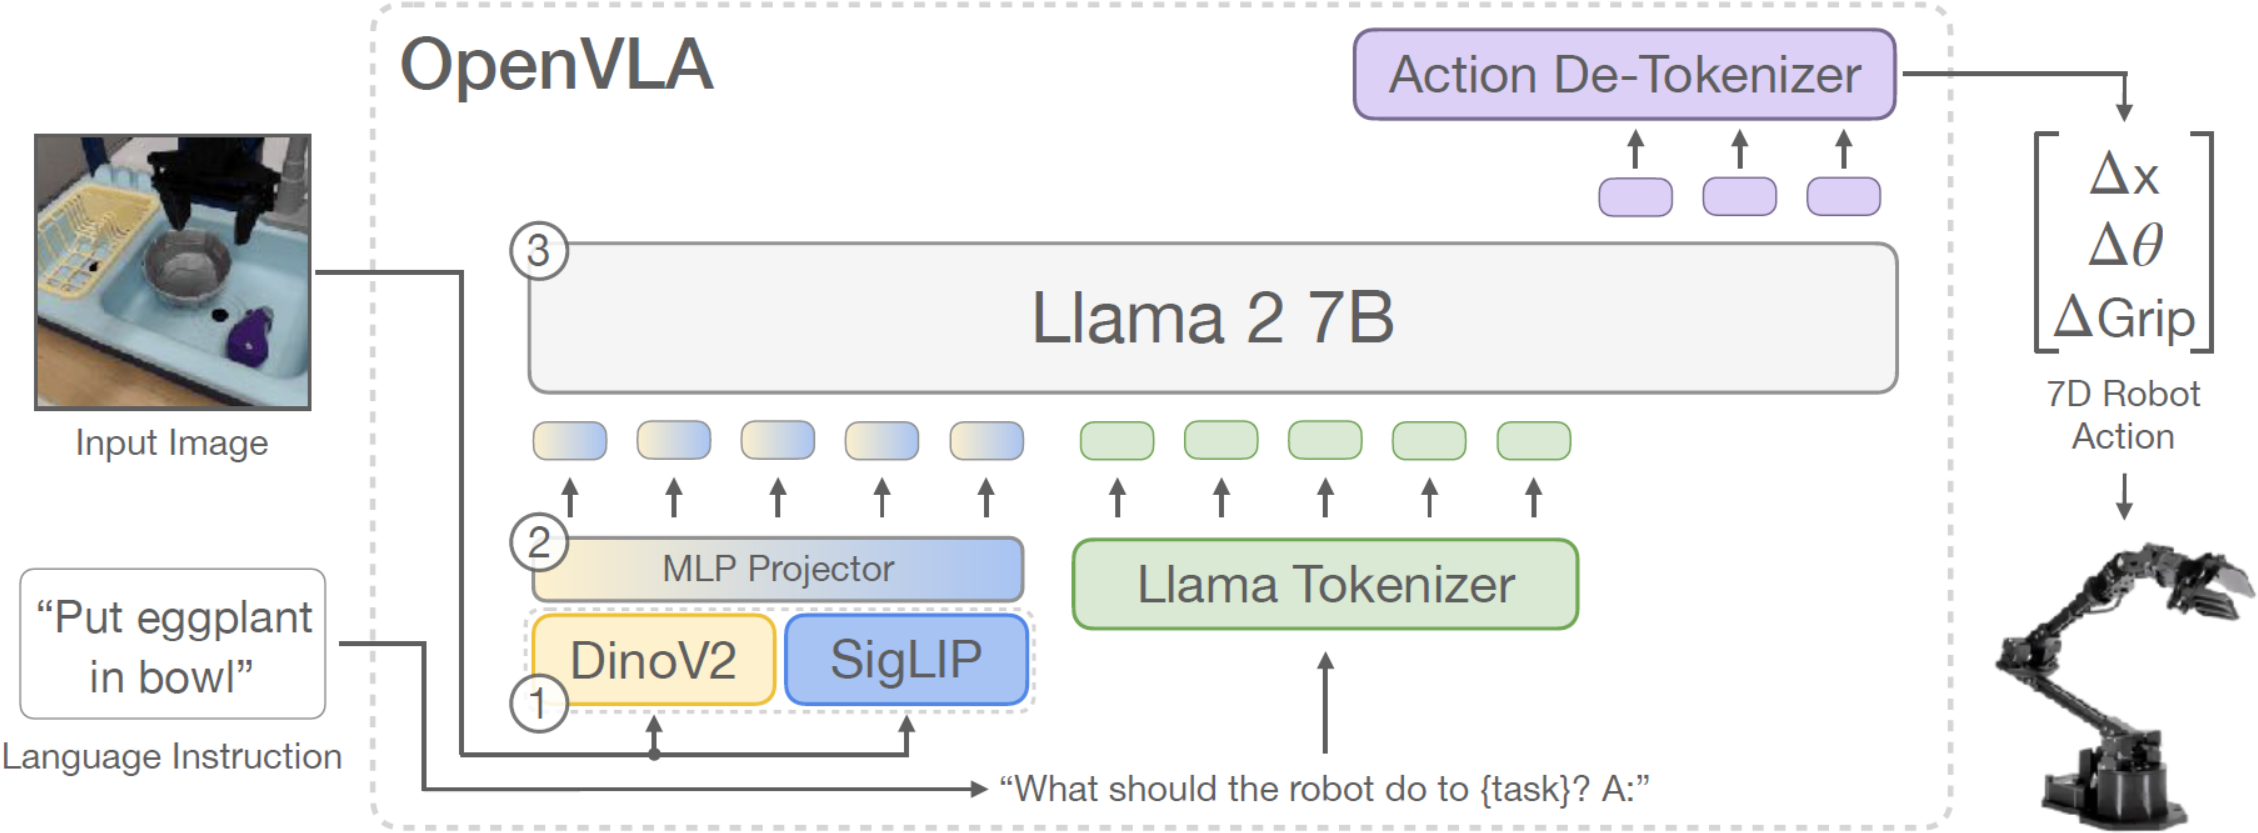
<!-- Figure 2: **OpenVLA model architecture**. Given an image observation and a language instruction, the model predicts 7-dimensional robot control actions. The architecture consists of three key components: (1) a **vision encoder** that concatenates Dino V2 [25] and SigLIP [77] features, (2) a **projector** that maps visual features to the language embedding space, and (3) the **LLM backbone**, a Llama 2 7B-parameter large language model [10]. -->
图2: **OpenVLA 模型架构**。给定一个图像观察和一个语言指令, 该模型预测 7 维的机器人控制动作。该架构包含三个关键组件: (1) **视觉编码器**, 拼接 Dino V2 [25] 和 SigLIP [77] 特征, (2) **投影器**, 将视觉特征映射到语言嵌入空间, (3) **LLM backbone**, Llama 2 7B 参数的大语言模型 [10]。

<!-- In this work, we build on the Prismatic-7B VLM [44]. Prismatic follows the same standard architecture described above, with a 600M-parameter visual encoder, a small 2-layer MLP projector, and a 7B-parameter Llama 2 language model backbone [10]. Notably, Prismatic uses a two-part visual encoder, consisting of pretrained SigLIP [77] and DinoV2 [25] models. Input image patches are passed separately through both encoders and the resulting feature vectors are concatenated channel-wise. In contrast to the more commonly used vision encoders such as CLIP- [78] or SigLIP-only encoders, the addition of DinoV2 features has been shown to be helpful for improved spatial reasoning [44], which can be particularly helpful for robot control. -->
&emsp;&emsp;在这项工作中, 我们在 Prismatic-7B VLM [44] 的基础上构建。[Prismatic](https://github.com/TRI-ML/prismatic-vlms) 遵循上述相同的标准架构, 具有一个 600M 参数的视觉编码器、一个小的 2 层 MLP 投影器和一个 7B 参数的 Llama 2 语言模型 backbone [10]。值得注意的是, Prismatic 使用两部分视觉编码器, 由预训练的 SigLIP [77] 和 DinoV2 [25] 模型组成。通过两个编码器分别传递输入图像 patches, 生成的特征向量按通道拼接。与更常用的视觉编码器(如 CLIP 编码器 [78] 或仅 SigLIP 编码器)相比, DinoV2 特征的添加已被证明有助于改进空间推理 [44], 这对机器人控制特别有帮助。

<!-- Neither SigLIP / DinoV2, nor Llama 2 release details about their training data, which likely consists of trillions of tokens of Internet-sourced image-text and text-only data respectively. The Prismatic VLM is fine-tuned on top of these components using the LLaVA 1.5 data mixture [43], which contains a total of approximately 1M image-text and text-only data samples from open-source datasets [29, 42, 79–81]. -->
&emsp;&emsp;SigLIP / DinoV2 和 Llama 2 均未公布他们训练数据的详细信息, 这些数据可能分别由数万亿个(来自互联网的图像文本和纯文本)词元组成。Prismatic VLM 在这些组件的基础上使用 LLaVA 1.5 数据混合 [43] 进行微调, 该数据包含来自开源数据集的总共约 100 万个图像-文本和纯文本数据样本 [29, 42, 79–81]。

## OpenVLA Training Procedure
<!-- To train OpenVLA, we fine-tune a pretrained Prismatic-7B VLM backbone for robot action prediction (see Fig. 2). We formulate the action prediction problem as a "vision-language" task, where an input observation image and a natural language task instruction are mapped to a string of predicted robot actions [7]. To enable the VLM's language model backbone to predict robot actions, we represent the actions in the output space of the LLM by mapping continuous robot actions to discrete tokens used by the language model's tokenizer. Following Brohan et al. [7], we discretize each dimension of the robot actions separately into one of 256 bins. For each action dimension, we set the bin width to uniformly divide the interval between the 1st and 99th quantile of the actions in the training data. Using quantiles instead of the min-max bounds Brohan et al. [7] used allows us to ignore outlier actions in the data that could otherwise drastically expand the discretization interval and reduce the effective granularity of our action discretization. -->
&emsp;&emsp;为了训练 OpenVLA，我们微调一个预训练的 Prismatic-7B VLM backbone, 用于机器人动作预测(见[图2](#fig.2))。我们将动作预测问题建模为"视觉-语言"任务，其中一个输入观察图像和一个自然语言任务指令被映射到预测的机器人动作字符串 [7]。为了使 VLM 的语言模型 backbone 能够预测机器人动作, 我们通过将连续的机器人动作映射到(语言模型的分词器器使用的)离散词元, 表示 LLM 输出空间中的动作。遵循 Brohan et al. [7], 我们将机器人动作的每个维度分别离散化为 256 bins 中的一个。对于每个动作维度, 我们将 bin 宽度设置, 以均匀划分训练数据中动作的第 1 分位数和第 99 分位数之间的区间。使用分位数代 min-max bounds Brohan et al. [7] 使我们忽略数据中的异常动作，否则这些异常动作会大幅扩大离散化区间, 并降低动作离散化的有效颗粒度。

<!-- Using this discretization, we obtain $N$ discrete integers $\in [0, \dots, 255]$ for an $N$-dimensional robot action. Unfortunately, the tokenizer used by OpenVLA's language backbone, the Llama tokenizer [10], only reserves 100 "special tokens" for tokens newly introduced during fine-tuning, which is too few for the 256 tokens of our action discretization. Instead, we again opt for simplicity and follow Brohan et al. [7]'s approach by simply overwriting the 256 least used tokens in the Llama tokenizer's vocabulary (which corresponds to the last 256 tokens) with our action tokens. Once the actions are processed into a sequence of tokens, OpenVLA is trained with a standard next-token prediction objective, evaluating the cross-entropy loss on the predicted action tokens only. We discuss key design decisions for implementing this training procedure in Section 3.4. Next, we describe the robot dataset we use for OpenVLA training. -->
&emsp;&emsp;使用这种离散化, 我们得到 $N$ 个离散整数 $\in [0, \dots, 255]$, 用于 $N$ 维机器人动作。不幸的是, OpenVLA 语言 backbone 使用的分词器, Llama 分词器器 [10], 仅为微调期间新引入的词元保留 100 个"特殊词元", 这对于我们动作离散化的 256 个词元来说太少了。相反, 我们再次选择简单性, 并遵循 Brohan et al. [7] 的方法, 简单地<font color="red">用我们的动作词元覆盖 Llama 分词器的词汇表中 256 个最少使用的词元(对应于最后 256 个词元)</font>。一旦动作被处理成词元序列, OpenVLA 使用标准的下一个词元预测目标进行训练, 仅评估预测动作词元上的交叉熵损失。我们在第 [3.4](#OpenVLA-Design-Decisions) 节中讨论实施此训练程序的关键设计决策。接下来, 我们描述用于 OpenVLA 训练的机器人数据集。

## Training Data
<!-- The goal in constructing the OpenVLA training dataset is to capture a large diversity of robot embodiments, scenes, and tasks. This enables the final model to control various robots out of the box and admits efficient fine-tuning to new robot setups. We leverage the Open X-Embodiment dataset [1] (OpenX) as a base to curate our training dataset. The full OpenX dataset, at the time of writing, consists of more than 70 individual robot datasets, with more than 2M robot trajectories, that were pooled into a coherent and easy-to-use data format in a large community effort. To make training on this data practical, we apply multiple steps of data curation to the raw dataset. -->
&emsp;&emsp;构建 OpenVLA 训练数据集的目标是捕获大量不同的机器人实施例、场景和任务。这使得最终模型能够开箱即用地控制各种机器人, 并允许对新机器人配置进行有效地微调。我们利用 Open X-Embodiment 数据集 [1] (OpenX) 作为基础, 以[策管](#ceguan)我们的训练数据集。在撰写本文时, 完整的 OpenX 数据集包含 70 多个独立的机器人数据集, 超过 2M 机器人轨迹, 该数据集在社区的共同努力下被汇总成一种连贯且易于使用的数据格式。为了使(在这些数据上)训练变得切实可行, 我们对原始数据集采用多步[数据策管](#ceguan)。

> <span id='ceguan'></span>在数据驱动的科学研究或数据密集型研究中, 科学家们需要大量使用和共享各种海量的数字资源, 这就要求对科学数据进行有效的收集、加工、组织、保存、发布等。在数据科学和 e-science 中, 将该类应用称为 data curation 或 digital curation, 中文译为"[数据策管](https://www.infocomm-journal.com/bdr/article/2019/2096-0271/2096-0271-5-6-00030.shtml)"、"数据监护"、"数据管护"等。

<!-- The goals of this curation are to ensure (1) a coherent input and output space across all training datasets, and (2) a balanced mix of embodiments, tasks, and scenes in the final training mixture. To address (1), we follow [1, 5] and restrict our training dataset to contain only manipulation datasets with at least one 3rd person camera and use single-arm end-effector control. For (2), we leverage the data mixture weights of Octo [5] for all datasets that pass the first round of filtering. Octo heuristically down-weights or removes less diverse datasets and up-weights datasets with larger task and scene diversity; see Octo Model Team et al. [5] for details. -->
&emsp;&emsp;该[策管](#ceguan)的目标是确保 (1) 所有训练数据集的输入和输出空间一致, (2) 最终训练混合中实施例、任务和场景的均衡混合<sup>[2](#superscript.2)</sup>。为了解决 (1), 我们遵循 [1, 5] 并限制我们的训练数据集, <font color="red">仅包含具有至少一个第三人称摄像机的操作数据集, 并使用单臂末端执行器控制</font>。对于 (2), 我们对于通过第一轮过滤的所有数据集, 利用 Octo [5] 的数据混合权重。Octo 启发式地降低权重或移除多样性较低的数据集, 并增加任务和场景多样性较大的数据集的权重; 更多详细信息请参阅 Octo Model Team et al. [5]。

<!-- Octo [5] demonstrated training across datasets with heterogeneous sensory inputs. While very promising, we leave an investigation of VLA training across heterogeneous sensor modalities and action spaces to future work. -->
> <sup>2</sup><span id='superscript.2'></span>Octo [5] 展示跨(带有异质感知输入的)数据集的训练。虽然很有前景, 我们将在未来的工作中研究跨异质传感器模态和动作空间的 VLA 训练。

<!-- We also experimented with incorporating a few additional datasets into our training mixture that were added to the OpenX dataset since the release of Octo, including the DROID dataset [11], although at a conservative mixture weight of 10%. In practice, we found that the action token accuracy on DROID remained low throughout training, suggesting a larger mixture weight or model may be required to fit its diversity in the future. To not jeopardize the quality of the final model, we removed DROID from the data mixture for the final third of training. We provide a complete overview of the used datasets and mixture weights in Appendix A. -->
&emsp;&emsp;我们还尝试将一些额外的数据集融入我们的训练混合中, 这些数据集自 Octo 发布以来已被添加到 OpenX 数据集, 包括 DROID 数据集 [11], 尽管保守的混合权重为 10%。在实践中, 我们发现 DROID 上的动作词元准确率在整个训练过程中一直很低, 这表明未来可能需要更大的混合权重或模型来适应其多样性。为了不危害最终模型的质量, 我们在训练的最后三分之一中, 从数据混合中移除了 DROID。我们在[附录A](#Data-Mixture-Details)中提供了所用数据集和混合权重的完整概述。

## OpenVLA Design Decisions
<!-- When developing the OpenVLA model, we explored various design decisions in smaller-scale experiments before starting the final model training run. Concretely, we trained and evaluated OpenVLA models on BridgeData V2 [6] for our initial experiments, instead of training on the full OpenX mixture, to increase iteration speed and reduce computational cost. We summarize key learnings from these explorations below. -->
&emsp;&emsp;当开发 OpenVLA 模型时, 我们在开始最终模型训练运行之前, 在小规模的实验中探索了各种设计决策。具体而言, 对于初步实验, 我们在 BridgeData V2 [6] 上训练并评估了 OpenVLA 模型, 而不是在全部的 OpenX 混合上进行训练, 以提高迭代速度并降低计算成本。我们在下面总结了这些探索中的关键经验。

<!-- **VLM Backbone**. Initially, we experimented with multiple VLM backbones. Apart from Prismatic [44], we tested fine-tuning IDEFICS-1 [82] and LLaVA [83] for robot action prediction. We found that LLaVA and IDEFICS-1 performed comparably on tasks with only one object in the scene, but LLaVA demonstrated stronger language grounding in tasks that involved multiple objects in the scene and required the policy to manipulate the correct object, i.e., the object specified in the language instruction. Concretely, LLaVA improved upon IDEFICS-1 by 35% in absolute success rate, averaged across five language grounding tasks in a BridgeData V2 sink environment. The fine-tuned Prismatic VLM policy achieved further improvements, outperforming the LLaVA policy by roughly 10% in absolute success rate across both simple single-object tasks and multi-object, language grounding tasks. We attribute this performance delta to improved spatial reasoning capabilities afforded by the fused SigLIP-DinoV2 backbones (see Section 3.1). In addition to the performance enhancements, Prismatic also provides a modular and easy-to-use codebase, so we ultimately chose it to be the backbone for the OpenVLA model. -->
**VLM Backbone**。最初, 我们尝试了多个 VLM backbones。除了 Prismatic [44] 之外, 我们还测试了微调 IDEFICS-1 [82] 和 LLaVA [83] 用于机器人动作预测。我们发现 LLaVA 和 IDEFICS-1 在场景中只有一个对象的任务上表现相当, 但 LLaVA 在场景中包含多个对象并需要策略来操控正确对象(即语言指令中指定的对象)的任务中表现出更强的语言基础。具体而言，LLaVA 在 BridgeData V2 sink 环境中的五个语言基础任务中平均绝对成功率比 IDEFICS-1 高 35%。微调的 Prismatic VLM 策略取得了进一步的改进, 在简单的单对象任务和多对象语言基础任务中, 其绝对成功率都比 LLaVA 策略高约 10%。我们将这一性能提升归因于融合的 SigLIP-DinoV2 backbones 所提供的改进的空间推理能力(参见第 [3.1](#Preliminaries:-Vision-Language-Models) 节)。除了性能增强之外, Prismatic 还提供了模块化且易于使用的代码库, 因此我们最终选择它作为 OpenVLA 模型的 backbone。

<!-- **Image Resolution**. The resolution of input images has significant impact on the computational requirements of VLA training, since higher-resolution images result in more image patch tokens and thus longer context lengths that quadratically increase training compute. We compared VLAs with $224 \times 224$px and $384 \times 384$px inputs, but found no performance difference in our evaluations, while the latter takes 3x longer to train. We thus opt for a resolution of $224 \times 224$px for the final OpenVLA model. Note that on many VLM benchmarks, increased resolution does improve performance [44, 84, 85], but we did not see this trend (yet) for VLAs. -->
**图像分辨率**。输入图像的分辨率对 VLA 训练的计算要求有重大影响, 因为更高分辨率的图像产生更多的图像 patch 词元，因此上下文长度更长, 从而训练计算量呈二次方增加。我们比较了使用 $224 \times 224$px 和 $384 \times 384$px 输入的 VLAs, 但在评估中没有发现性能差异, 然而后者花费 3 倍的时间来训练。因此，我们选择 $224 \times 224$px 的分辨率, 用于最终 OpenVLA 模型。请注意, 在许多 VLM 基准测试中, 提高分辨率确实可以提高性能 [44, 84, 85], 但对于 VLAs, 我们尚未看到这种趋势。

<!-- **Fine-Tuning Vision Encoder**. Prior work on VLMs found that freezing vision encoders during VLM training typically leads to higher performance [44]. Intuitively, a frozen vision encoder may better preserve the robust features learned from its Internet-scale pretraining. However, we found fine-tuning the vision encoder during VLA training to be crucial for good VLA performance. We hypothesize that the pretrained vision backbone may not capture sufficient fine-grained spatial details about important parts of the scene to enable precise robotic control. -->
**微调视觉编码器**。先前关于 VLMs 的研究发现, 在 VLM 训练期间冻结视觉编码器通常会带来更高的性能 [44]。直观地, 冻结的视觉编码器可能更好地保留(从其互联网规模预训练中学习到的)鲁棒特征。然而, 我们发现在 VLA 训练期间, 微调视觉编码器对于良好的 VLA 性能至关重要。我们假设预训练的视觉 backbone 可能无法捕获足够的有关场景重要部分的细粒度空间细节, 无法实现精确的机器人控制。

<!-- **Training Epochs**. Typical LLM or VLM training runs complete at most one or two epochs through their training dataset. In contrast, we found it important for VLA training to iterate through the training dataset significantly more times, with real robot performance continually increasing until training action token accuracy surpasses 95%. Our final training run completes 27 epochs through its training dataset. -->
**训练 Epochs**。典型的 LLM 或 VLM 训练运行在它们的训练数据集上最多完成一到两个 epochs。相比之下, 我们发现在训练数据集上迭代更多次对 VLA 训练非常重要, 实际机器人性能持续提高, 直到训练动作词元准确率超过 95%。我们的最终训练运行在其训练数据集上完成 27 个 epochs。

<!-- **Learning Rate**. We swept the learning rate across multiple orders of magnitude for VLA training, and achieved the best results using a fixed learning rate of 2e-5 (the same learning rate used during VLM pretraining [44]). We did not find learning rate warmup to provide benefits. -->
**学习率**。我们在多个数量级中搜索学习率用于 VLA 训练, 并使用固定学习率 2e-5(与 VLM 预训练期间使用的学习率相同 [44])取得了最佳效果。我们没有发现学习率预热能够提供益处。

## Infrastructure for Training and Inference
<!-- The final OpenVLA model is trained on a cluster of 64 A100 GPUs for 14 days, or a total of 21,500 A100-hours, using a batch size of 2048. During inference, OpenVLA requires 15GB of GPU memory when loaded in bfloat16 precision (i.e., without quantization) and runs at approximately 6Hz on one NVIDIA RTX 4090 GPU (without compilation, speculative decoding, or other inference speed-up tricks). We can further reduce the memory footprint of OpenVLA during inference via quantization, without compromising performance in real-world robotics tasks, as shown in Section 5.4. We report inference speed on various consumer- and server-grade GPUs in Fig. 6. For convenience, we implement a remote VLA inference server to allow real-time remote streaming of action predictions to the robot – removing the requirement of having access to a powerful local compute device to control the robot. We release this remote inference solution as part of our open-source code release (Section 4). -->
&emsp;&emsp;最终的 OpenVLA 模型在 64 个 A100 GPU 集群上训练了 14 天, 总共 21,500 个 A100 小时, 使用批处理大小为 2048。在推理期间, OpenVLA 在以 `bfloat16` 精度加载时需要 15GB 的 GPU 显存(即没有量化), 并在一个 NVIDIA RTX 4090 GPU 上以大约 6Hz 的速度运行(没有编译、推测解码或其他推理加速技巧)。我们可以通过量化进一步减少 OpenVLA 在推理期间的内存占用, 而不会影响现实世界机器人任务的性能, 如第 [5.4](#Memory-Efficient-Inference-via-Quantization) 节所示。我们在[图6](#fig.6)中报告了在各种消费级和服务器级 GPUs 上的推理速度。为方便起见, 我们实现了一个远程 VLA 推理服务器, 允许实时远程向机器人传输动作预测, 无需访问强大的本地计算设备来控制机器人。我们将该远程推理解决方案作为开源代码的一部分发布(第 [4](#The-OpenVLA-Codebase) 节)。

# The OpenVLA Codebase

<!-- Along with our model, we release the OpenVLA codebase, a modular PyTorch codebase for training VLA models (see https://openvla.github.io). It scales from fine-tuning VLAs on individual GPUs to training billion-parameter VLAs on multi-node GPU clusters, and supports modern techniques for large transformer model training such as automatic mixed precision (AMP, PyTorch [73]), FlashAttention [74], and fully sharded data parallelism (FSDP, Zhao et al. [75]). Out of the box, the OpenVLA codebase has full support for training on the Open X dataset, integrates with HuggingFace's [21] AutoModel class, and supports LoRA fine-tuning [26] and quantized model inference [27, 86]. -->
&emsp;&emsp;我们发布了我们的模型以及 OpenVLA 代码库, 一个用于训练 VLA 模型的模块化 PyTorch 代码库(请参阅 https://openvla.github.io)。它可以从在单个 GPU 上微调 VLAs 扩展到在多节点 GPU 集群上训练数十亿参数的 VLAs, 并支持大型 transformer 模型训练的现代技术, 例如automatic mixed precision (AMP, PyTorch [73])、FlashAttention [74] 和 fully sharded data parallelism (FSDP, Zhao et al. [75])。开箱即用的 OpenVLA 代码库完全支持在 Open X 数据集上进行训练, 与 HuggingFace [21] 的 AutoModel 类集成, 并支持 LoRA 微调 [26] 和量化模型推理 [27, 86]。

# Experiments
<!-- The goal of our experimental evaluations is to test OpenVLA's ability to serve as a powerful multi-robot control policy out of the box, as well as be a good initialization for fine-tuning to new robot tasks. Concretely, we aim to answer the following questions:
1. How does OpenVLA compare to prior generalist robot policies, when evaluating on multiple robots and various types of generalization?
2. Can OpenVLA be effectively fine-tuned on a new robot setup and task, and how does it compare to state-of-the-art data-efficient imitation learning approaches?
3. Can we use parameter-efficient fine-tuning and quantization to reduce the computational requirements for training and inference of OpenVLA models and make them more accessible? What are the performance-compute trade-offs? -->
&emsp;&emsp;我们实验的评估目标是测试 OpenVLA 的能力, 作为一种强大的开箱即用的多机器人控制策略, 并为微调新的机器人任务提供良好的初始化。具体而言, 我们旨在回答以下问题:
1. 当评估多种机器人和不同类型的泛化时, OpenVLA 与之前的通用机器人策略相比如何?
2. OpenVLA 能否在新的机器人配置和任务上进行有效微调? 它与最先进的数据高效的模仿学习方法相比如何?
3. 我们能否使用参数高效的微调和量化来减少 OpenVLA 模型训练和推理的计算要求, 并使其更容易使用? 性能与计算之间的权衡是什么?

## Direct Evaluations on Multiple Robot Platforms
<!-- **Robot Setups and Tasks**. We evaluate OpenVLA's performance "out-of-the-box" on two robot embodiments: the WidowX robot from the BridgeData V2 evaluations [6] (see Fig. 1, left) and the mobile manipulation robot from the RT-1 and RT-2 evaluations [2, 7] ("Google robot"; see Fig. 1, middle). Both platforms have been extensively used in prior works for evaluating generalist robot policies [1, 2, 5, 7]. We define a comprehensive set of evaluation tasks in each environment that covers various axes of generalization, such as **visual** (unseen backgrounds, distractor objects, colors/appearances of objects); **motion** (unseen object positions/orientations); **physical** (unseen object sizes/shapes); and **semantic** (unseen target objects, instructions, and concepts from the Internet) generalization. We also assess language conditioning ability in scenes with multiple objects, testing whether the policy can manipulate the correct target object, as specified in the user's prompt. See bottom row of Fig. 3 and Fig. 4 for example task images in the BridgeData V2 and Google robot evaluations, respectively. Overall, we evaluated each method in 170 rollouts (17 tasks with 10 trials each) for BridgeData V2 experiments and 60 rollouts (12 tasks with 5 trials each) for Google robot experiments. A detailed breakdown of all tasks and how they differ from the training data is in Appendix B. All evaluations in this and the following sections are conducted as A/B evaluations, using the same tasks with the same sets of initial robot and object states, to ensure fair comparison.  -->
**机器人配置和任务**。我们在两个机器人实施例上评估 OpenVLA 的"开箱即用"性能: 来自 BridgeData V2 评估的 WidowX 机器人 [6](见[图1](#fig.1)左) 和来自 RT-1 和 RT-2 评估的移动操作机器人 [2, 7]("Google 机器人"; 见[图1](#fig.1)中)。在先前的研究中, 这两个平台被广泛用于评估通用机器人策略 [1, 2, 5, 7]。我们在每个环境中定义了一套全面的评估任务, 涵盖了各种泛化维度, 例如**视觉**(未见过的的背景、干扰对象、对象的颜色/外观)、**运动**(未见过的对象位置/方向)、**物理**(未见过的对象大小/形状)和**语义**(未见过的目标对象、指令和来自互联网的概念)泛化。我们还在具有多对象的场景中, 评估了语言条件能力, 测试策略是否可以操控正确目标对象, 正如用户提示中指定的那样。[图3](#fig.3) 和 [图4](#fig.4) 的最后一行分别是 BridgeData V2 和 Google 机器人评估中的示例任务图像。总体而言, 我们在 BridgeData V2 实验的 170 次 rollouts (17 个任务, 每个任务 10 次实验)和 Google 机器人实验的 60 次 rollouts (12 个任务, 每个任务 5 次实验)中评估了每种方法。所有任务的详细分解以及它们与训练数据的不同之处在[附录B](#Appendix.B)中。在本节和接下来的章节中, 所有评估均以 A/B 评估的形式进行, 使用相同的任务和相同的初始机器人和对象状态集, 以确保公平比较。

<!-- **Comparisons**. We compare OpenVLA's performance to three prior generalist manipulation policies: RT-1-X [1], RT-2-X [1], and Octo [5]. RT-1-X (35M parameters) and Octo (93M parameters) are transformer policies trained from scratch on subsets of the OpenX dataset; Octo is the state-of-the-art model among open-source manipulation policies. RT-2-X (55B parameters) is a state-of-the-art, closed-source VLA that leverages Internet-pretrained vision and language backbones. -->
**对比**。我们将 OpenVLA 的性能与三种先前的通用操纵策略进行比较: RT-1-X [1]、RT-2-X [1] 和 Octo [5]。RT-1-X (35M 参数) 和 Octo (93M 参数) 是在 OpenX 数据集的子集上从头开始训练的 transformer 策略; Octo 是开源操作策略中最先进的模型。RT-2-X (55B 参数) 是一种最先进的闭源 VLA, 它利用互联网预训练的视觉和语言 backbones。

<!-- The results are summarized in Fig. 3 for BridgeData V2 evaluations and Fig. 4 for Google robot evaluations (per-task breakdown in Appendix, Table 4 and Table 5). We find that both RT-1-X and Octo struggle on the tested tasks, often failing to manipulate the correct object, especially when distractors are present, and in some cases causing the robot to wave its arm around aimlessly. Note that our evaluations test even larger degrees of generalization than the evaluations performed in those prior works to challenge the Internet-pretrained VLA models. Thus, lower performance of models without Internet pretraining is expected. RT-2-X clearly outperforms both RT-1-X and Octo, demonstrating the benefits of large, pretrained VLMs for robotics. -->
&emsp;&emsp;BridgeData V2 评估的结果总结在[图3](#fig.3)中, Google 机器人评估的结果总结在[图4](#fig.4)中(每个任务分解见附录中的[表4](#table.4)和[表5](#table.5))。我们发现 RT-1-X 和 Octo 在测试的任务上都表现不佳, 经常无法操作正确的物体, 尤其是当干扰物存在时, 并且在某些情况下导致机器人漫无目的地挥动手臂。请注意, 与之前挑战互联网预训练 VLA 模型的工作中进行的评估相比, 我们的评估测试了更大程度的泛化。因此, 未经互联网预训练的模型性能预计会较低。RT-2-X 明显优于 RT-1-X 和 Octo, 证明了大型预训练 VLM 对机器人的益处。

<span id='fig.3'></span>
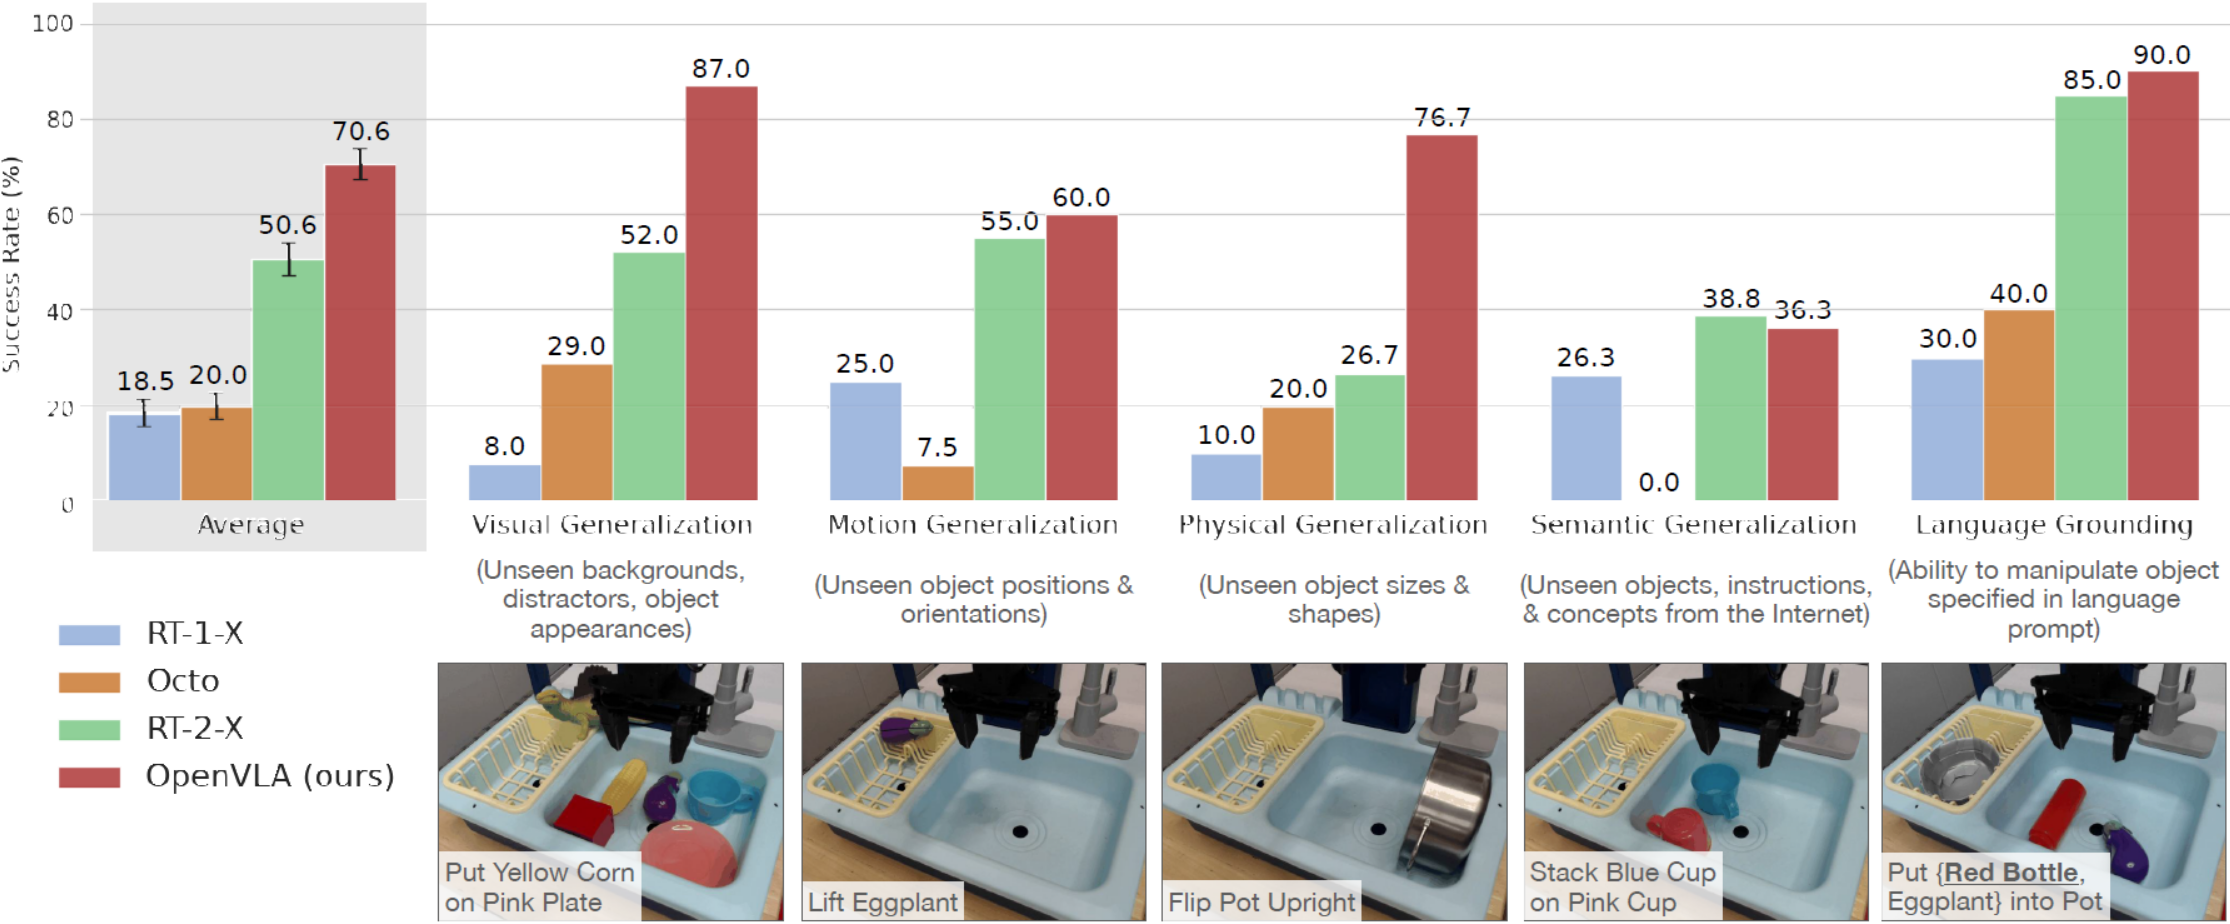
<!-- Figure 3: **BridgeData V2 WidowX robot evaluation tasks and results**. We evaluate OpenVLA and prior state-of-the-art generalist robot policies on a comprehensive suite of tasks covering several axes of generalization, as well as tasks that specifically assess language conditioning ability. OpenVLA achieves highest overall performance and even outperforms closed-source model RT-2-X in all categories except for semantic generalization. Average success rates $\pm$ StdErr are computed across 170 total rollouts per approach. See Table 4 for detailed results. -->
图3: **BridgeData V2 WidowX 机器人评估任务和结果**。我们在一系列涵盖多个泛化轴的全方位任务以及专门评估语言条件能力的任务上, 评估了 OpenVLA 和之前最先进的通用机器人策略。OpenVLA 实现了最高的整体性能, 甚至在除语义泛化之外的所有类别中都优于闭源模型 RT-2-X。平均成功率 $\pm$ StdErr 根据每种方法总共 170 次 rollouts 计算得到。详细结果请参阅[表4](#table.4)。

<span id='fig.4'></span>
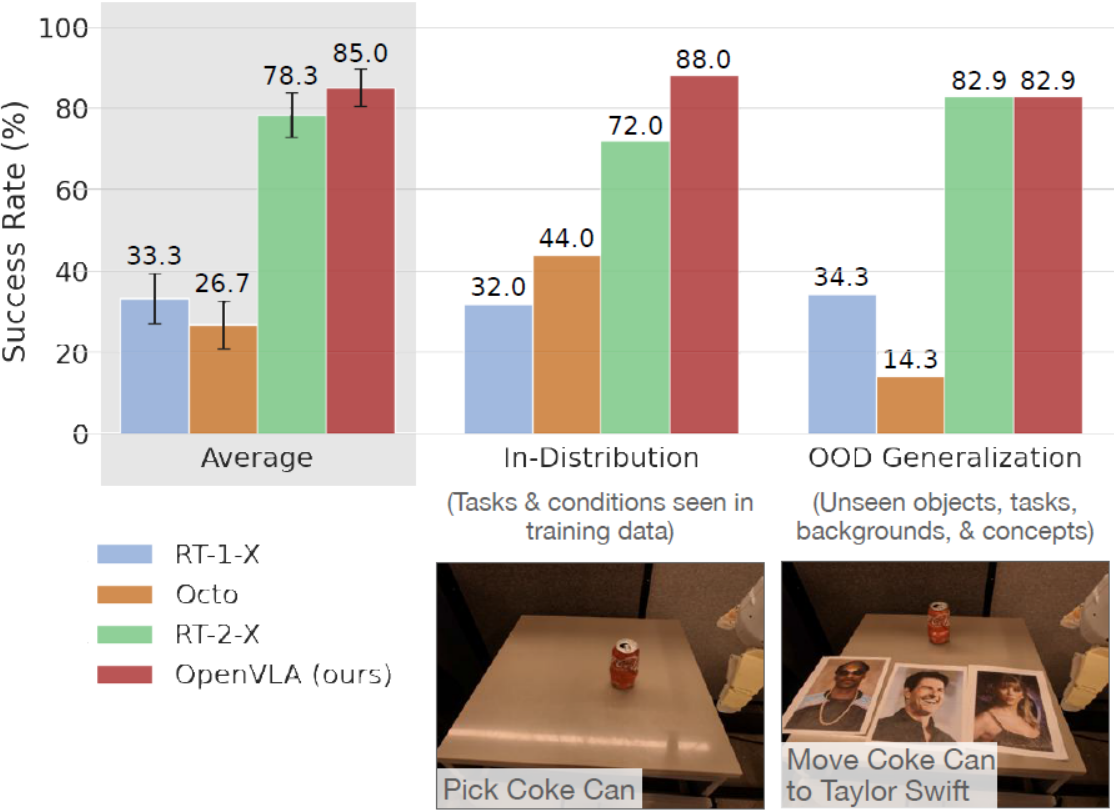
<!-- Figure 4: **Google robot evaluation results**. We evaluate generalist robot policies on in-distribution and out-of-distribution (OOD) tasks on the mobile manipulator used in RT-1 and RT-2 evaluations [2, 7]. We find that OpenVLA and RT-2-X attain comparable performance and significantly outperform RT-1-X and Octo overall. Average success rates $\pm$ StdErr are computed across 60 total rollouts per approach. See Table 5 for detailed results. -->
图4: **Google 机器人评估结果**。我们在 RT-1 和 RT-2 评估中使用的移动机械手上, 评估了分布内和分布外 (OOD) 任务的通用机器人策略 [2, 7]。我们发现 OpenVLA 和 RT-2-X 达到相当的性能, 并且总体上明显优于 RT-1-X 和 Octo。平均成功率 $\pm$ StdErr 根据每种方法总共 60 次 rollouts 计算得到。详细结果请参阅[表5](#table.5)。

todo: 表4 & 表5

<!-- Notably, OpenVLA performs comparably to RT-2-X on Google robot evaluations and significantly outperforms RT-2-X on BridgeData V2 evaluations despite being an order of magnitude smaller (7B vs. 55B parameters). Qualitatively, we find that both RT-2-X and OpenVLA exhibit markedly more robust behaviors than the other tested models, such as approaching the correct object when distractor objects are present, properly orienting the robot's end-effector to align with the orientation of the target object, and even recovering from mistakes such as insecurely grasping objects (see https://openvla.github.io for qualitative rollout examples). RT-2-X achieves higher performance in semantic generalization tasks, as shown in Fig. 3, which is expected given that it uses larger-scale Internet pretraining data and is co-fine-tuned with both robot action data and Internet pretraining data to better preserve the pretraining knowledge, rather than being fine-tuned solely on robot data, like OpenVLA. However, OpenVLA performs comparably or better in all other task categories in both BridgeData V2 and Google robot evaluations. The performance difference can be attributed to a combination of factors: we curated a much larger training dataset for OpenVLA with 970k trajectories (vs. 350k for RT-2-X); we performed more careful cleaning of the training dataset and, e.g., filtered out all-zero actions in the Bridge dataset (see Appendix C for a detailed discussion); and OpenVLA uses a fused vision encoder that combines pretrained semantic and spatial features. -->
&emsp;&emsp;值得注意的是, OpenVLA 在 Google 机器人评估上表现与 RT-2-X 相当, 并且在 BridgeData V2 评估上明显优于 RT-2-X, 尽管 OpenVLA 数量级更小 (7B vs 55B 参数)。从定性角度来看, 我们发现 RT-2-X 和 OpenVLA 都明显表现出比其他测试模型更鲁棒的行为, 例如当干扰物体存在时接近正确的物体, 恰当地调整机器人的末端执行器以与目标物体的方向对齐, 甚至从(不牢固地抓握物体等)错误中恢复(有关定性 rollout 示例请参阅 https://openvla.github.io)。RT-2-X 在语义泛化任务中取得了更高的性能, 如[图3](#fig.3)所示, 这是预期的, 因为它使用更大规模的互联网预训练数据, 并用机器人动作数据和互联网预训练数据共同微调, 以更好地保留预训练知识, 而不是像 OpenVLA 那样, 仅在机器人数据上进行微调。然而, OpenVLA 在 BridgeData V2 和 Google 机器人评估中的所有其他任务类别中上表现相当或更好。性能差异可以归因于多种因素的组合: 我们为 OpenVLA [策管](#ceguan)了一个更大的训练数据集, 其中包含 970k 条轨迹 (RT-2-X 只有 350k 条轨迹); 我们对训练数据集执行了更仔细的清理, 例如, 过滤掉了 Bridge 数据集中的全零动作(详细讨论请参阅[附录C](Appendix.C)); OpenVLA 使用融合视觉编码器, 其组合预训练的语义和空间特征。

## Data-Efficient Adaptation to New Robot Setups
<!-- While prior works mainly focused on directly evaluating VLAs "out-of-the-box" [1, 7, 16], effective fine-tuning of VLA models to new tasks and robot setups is largely unexplored, yet is key for their widespread adoption. In this section, we investigate OpenVLA’s ability to be quickly adapted to a new robot setup. -->
&emsp;&emsp;尽管之前的研究主要侧重于直接评估"开箱即用"的 VLAs [1, 7, 16], 但 VLA 模型对新任务和机器人配置的有效微调尚未得到充分探索, 但这是它们广泛采用的关键。在本节中, 我们探讨 OpenVLA 快速适应新机器人配置的能力。

<!-- **Robot setups and tasks**. We test a simple fine-tuning recipe for the OpenVLA model: full fine-tuning of all model parameters, using small datasets with 10–150 demonstrations of a target task (see Fig. 5; we explore parameter-efficient fine-tuning approaches in Section 5.3). We test OpenVLA in two setups: **Franka-Tabletop**, a stationary, table-mounted Franka Emika Panda 7-DoF robot arm; and **Franka-DROID**, the Franka robot arm setup from the recently released DROID dataset [11], mounted on a movable standing desk. The setups use 5Hz and 15 Hz non-blocking controllers, respectively. We choose Franka robot arms as the target embodiment for our fine-tuning experiments since they are widely used in the robot learning community and thus a likely "target" of OpenVLA fine-tuning. We test on setups with different control frequencies to test OpenVLA’s applicability to a range of use cases. -->
**机器人配置和任务**。我们测试了 OpenVLA 模型的一个简单微调方法: 所有模型参数的全面微调, 使用包含 10-150 个目标任务演示的小型数据集(参见[图5](#fig.5); 我们在第 [5.3](#Parameter-Efficient-Fine-Tuning) 节中探索参数高效的微调方法)。我们在两种配置中测试 OpenVLA: **Franka-Tabletop**, 一种静止的、台式的 Franka Emika Panda 7-DoF 机械臂; **Franka-DROID**, 来自最近发布的 DROID 数据集 [11] 的 Franka 机械臂配置, 安装在可移动的站立式办公桌上。这些配置分别使用 5Hz 和 15 Hz non-blocking 控制器。我们选择 Franka 机械臂作为我们微调实验的目标实施例, 因为它们在机器人学习社区中被广泛使用, 因此很可能是 OpenVLA 微调的"目标"。我们在具有不同控制频率的配置上进行测试, 以测试 OpenVLA 对一系列用例的适用性。

<span id='fig.5'></span>
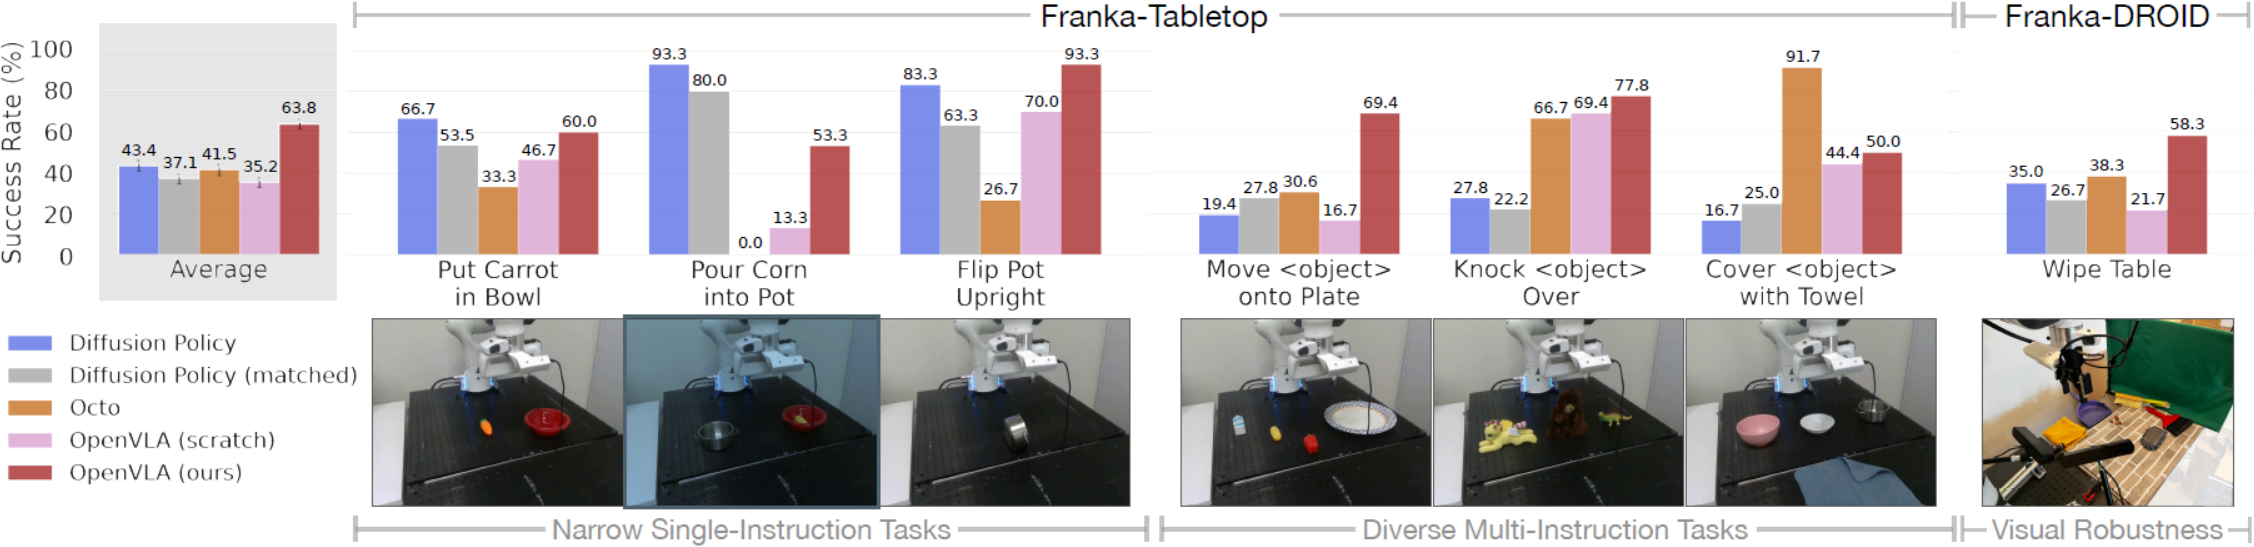
<!-- Figure 5: **Adapting to new robot setups**. We evaluate the state-of-the-art Diffusion Policy trained from scratch on seven Franka Emika Panda tasks (10–150 demonstrations each), as well as generalist robot policies Octo and OpenVLA fine-tuned on the same data. Diffusion Policy exhibits strong performance on narrow single-instruction tasks, while Octo and OpenVLA perform better on diverse fine-tuning tasks involving multiple instructions and distractor objects. Overall, OpenVLA achieves highest aggregate performance across both setups, suggesting that it is an effective default for learning a policy on a downstream task. Average success rates $\pm$ StdErr are computed across 129 rollouts per approach (99 for Franka-Tabletop tasks and 30 for Franka-DROID tasks). See Table 6 for detailed results. -->
图5: **适应新的机器人配置**。我们在七个 Franka Emika Panda 任务(每个任务 10-150 次演示)上, 评估了从头开始训练的最先进的扩散策略, 以及在相同数据上微调的通用机器人策略 Octo 和 OpenVLA。扩散策略在有限的单指令任务上展现出强劲的性能, 而 Octo 和 OpenVLA 在涉及多指令和干扰对象的各种微调任务上表现更好。总体而言, OpenVLA 在两种配置中均实现了最高的总体性能, 表明它是学习下游任务策略的有效默认配置。平均成功率 $\pm$ StdErr 根据每种方法的 129 次 rollouts 计算得到(Franka-Tabletop 任务 99 个, Franka-DROID 任务 30 个)。详细结果请参阅[表6](#table.6)。

todo: 表6

<!-- **Comparisons**. We compare to **Diffusion Policy** [3], a state-of-the-art data-efficient imitation learning approach, trained from scratch. We also compare to **Diffusion Policy (matched)**, a version of Diffusion Policy that matches the input and output specifications of OpenVLA. Additionally, we evaluate **Octo** [5] fine-tuned on the target dataset, since it is currently the best generalist policy that supports fine-tuning (fine-tuning of RT-2-X is not supported through its inference API). We also fine-tune OpenVLA on the same target dataset, and the resulting policy is denoted by **OpenVLA**. Finally, as an ablation experiment, we compare to **OpenVLA (scratch)**, where we directly fine-tune the underlying base Prismatic VLM on the target robot setup – rather than fine-tuning the OpenX-pretrained OpenVLA model – to assess the benefit of large-scale robot pretraining. -->
**比较**。我们对比了**扩散策略** [3], 一种最先进的数据高效模仿学习方法, 从头开始训练。我们还对比了**扩散策略(matched)**, 一个与 OpenVLA 输入和输出格式相匹配的扩散策略版本<sup>[3](#superscript.3)</sup>。此外, 我们评估了在目标数据集上微调的**Octo** [5], 因为它是目前支持微调的最佳通用策略(RT-2-X 的推理 API 不支持微调)。我们还在同一个目标数据集上微调 OpenVLA, 并且生成的策略被表示为**OpenVLA**。最后, 作为一个消融实验, 我们对比了**OpenVLA**(**scratch**), 其中我们直接在目标机器人配置上微调底层基础 Prismatic VLM, 而不是微调 OpenX 预训练的 OpenVLA 模型, 以评估大规模机器人预训练的益处。

<!-- The full Diffusion Policy uses a two-step observation history with both images and proprioceptive state, and performs receding horizon control by predicting a chunk of $T$ future actions and executing the first $X$ actions in open-loop fashion before predicting the next chunk (for 15Hz control, we set $T = 16$, $X = 8$ like in the DROID prior work [11]; for 5Hz control, we reduce the chunk sizes to $T = 8$, $X = 3$). It is also the only method in Section 5.2 that predicts absolute Cartesian coordinates to control the robot; all other methods use relative position control. Diffusion Policy (matched) uses a single image as input, has no proprioceptive information and no observation history, and predicts a single relative position control action without action chunking. -->
> <sup>3</sup><span id='superscript.3'></span>完整的扩散策略采用两步观察历史, 包含图像和本体感知状态, 并通过(在预测下一个动作块之前)预测 $T$ 个未来动作的块并以开环方式执行前 $X$ 个动作, 执行滚动时域控制(对于 15Hz 控制, 我们设置 $T = 16$, $X = 8$, 像 DROID 先前的工作 [11] 一样; 对于 5Hz 控制, 我们将块大小减小到 $T = 8$, $X = 3$)。它也是第 [5.2](#Data-Efficient-Adaptation-to-New-Robot-Setups) 节中唯一的方法, <font color="red">该方法预测绝对笛卡尔坐标来控制机器人; 所有其他方法都使用相对位置控制</font>。扩散策略(matched)使用单个图像作为输入, 没有本体感知信息和观察历史, 并且预测单个相对位置控制动作, 无需动作分块。

<!-- We present the results in Fig. 5 (per-task breakdown in Appendix, Table 6). We find that both versions of Diffusion Policy are competitive with or outperform the generalist policies Octo and OpenVLA on narrower single-instruction tasks like "Put Carrot in Bowl" and "Pour Corn into Pot", but the pretrained generalist policies perform better in more diverse fine-tuning tasks that involve multiple objects in the scene and require language conditioning. OpenX pretraining for Octo and OpenVLA enables the models to better adapt to these more diverse tasks where language grounding is important; we see evidence for this in the lower performance of OpenVLA (scratch). -->
&emsp;&emsp;我们在[图5](#fig.5)中展示了结果(每个任务的分解见附录中的[表6](#table.6))。我们发现, 在"将胡萝卜放入碗中"和"将玉米倒入锅中"等有限的单指令任务上, 扩散策略的两个版本都与通用策略 Octo 和 OpenVLA 相媲美或表现更好, 但预训练的通用策略在(涉及场景中的多对象并需要语言条件的)更多样化的微调任务中表现更好。Octo 和 OpenVLA 的 OpenX 预训练使模型能够更好地适应更多样化的任务, 其中语言基础很重要; 我们在 OpenVLA (scratch) 较低的性能中看到这一证据。

<!-- Overall, we find that OpenVLA achieves the highest average performance. Notably, most prior works achieve strong performance only in *either* narrow single-instruction *or* diverse multi-instruction tasks, resulting in widely varying success rates. OpenVLA is the only approach that achieves at least 50% success rate across all tested tasks, suggesting that it can be a strong default option for imitation learning tasks, particularly if they involve a diverse set of language instructions. For narrower but highly dexterous tasks, Diffusion Policy still shows smoother and more precise trajectories; incorporating action chunking and temporal smoothing, as implemented in Diffusion Policy, may help OpenVLA attain the same level of dexterity and may be a promising direction for future work (see Section 6 for a detailed discussion of current limitations). -->
&emsp;&emsp;总体而言, 我们发现 OpenVLA 实现了最高的平均性能。值得注意的是, 大多数先前的工作在有限的单指令或者多样化的多指令任务中实现出色的性能, 导致成功率差异很大。OpenVLA 是唯一的方法, 该方法在所有测试任务中实现至少 50% 成功率, 这表明它可以用作模仿学习任务的强大默认选项, 特别是如果它们涉及一组多样化的语言指令。<font color="blue">对于有限但高度灵巧的任务, 扩散策略仍展现出更平滑且更精确的轨迹</font>; 融合(扩散策略中实现的)动作分块和时间平滑, 可能有助于 OpenVLA 达到相同的灵巧度, 并且可能是未来工作的一个有希望的方向(有关当前局限性的详细讨论, 请参阅第 [6](#Discussion-and-Limitations) 节)。

## Parameter-Efficient Fine-Tuning
<!-- The full fine-tuning runs of OpenVLA in the previous section used 8 A100 GPUs for 5-15 hours per task (depending on the dataset size) to achieve high performance. While this is substantially less compute than what is required for VLA pretraining, in this section we explore even more compute- and parameter-efficient fine-tuning approaches and investigate their effectiveness. -->
&emsp;&emsp;上一节中 OpenVLA 的完全微调运行使用了 8 个 A100 GPU, 每个任务耗时 5-15 小时(取决于数据集大小), 以实现高性能。尽管这比 VLA 预训练所需的计算量少得多, 但在本节中, 我们探索更多计算和参数高效的微调方法, 并探讨它们的有效性。

<!-- Concretely, we compare the following fine-tuning approaches: **full fine-tuning** updates all weights during fine-tuning, as described in Section 5.2; **last layer only** fine-tunes only the last layer of OpenVLA's transformer backbone and the token embedding matrix; **frozen vision** freezes the vision encoder but fine-tunes all other weights; **sandwich fine-tuning** unfreezes the vision encoder, token embedding matrix, and last layer; and **LoRA** uses the popular low-rank adaptation technique of Hu et al. [26] with multiple rank values $r$, applied to all linear layers of the model. -->
&emsp;&emsp;具体而言, 我们比较了下列微调方法: **完全微调**在微调期间更新所有权重, 如第 [5.2](#Data-Efficient-Adaptation-to-New-Robot-Setups) 节所述; **仅最后一层** 仅微调 OpenVLA 的 Transformer backbone 的最后一层和词元嵌入矩阵; **冻结视觉** 冻结视觉编码器, 但微调所有其他权重; **sandwich 微调** 解冻视觉编码器、词元嵌入矩阵和最后一层; **LoRA** 使用流行低秩自适应技术(Hu et al. [26]), 具有多个秩值 $r$, 应用于模型的所有线性层。

<!-- We report fine-tuning success rates across multiple Franka-Tabletop tasks, as well as training parameter count and GPU memory requirements, in Table 1.4 We find that only fine-tuning the network's last layer or freezing the vision encoder leads to poor performance, suggesting that further adaptation of the visual features to the target scene is crucial. In contrast, "sandwich fine-tuning" achieves better performance since it fine-tunes the vision encoder, and it consumes less GPU memory since it does not fine-tune the full LLM backbone. Lastly, LoRA achieves the best trade-off between performance and training memory consumption, outperforming "sandwich fine-tuning" and matching full fine-tuning performance while fine-tuning only 1.4% of the parameters. We find that the LoRA rank has negligible effect on policy performance and thus recommend using a default rank of $r = 32$. With LoRA, we can fine-tune OpenVLA on a new task within 10-15 hours on a single A100 GPU – an 8x reduction in compute compared to full fine-tuning. -->
&emsp;&emsp;我们在[表1](#table.1)中报告了在多个 Franka-Tabletop 任务中的微调成功率、训练参数数量和 GPU 内存需求<sup>[4](#superscript.4)</sup>。我们发现, 仅微调网络的最后一层或冻结视觉编码器会导致性能不佳, 表明进一步适应目标场景的视觉特征至关重要。相比之下, "sandwich 微调"因微调视觉编码器而实现了更好的性能, 并且因没有微调整个的 LLM backbone 而消耗更少的 GPU 内存。最后, LoRA 在性能和训练内存消耗之间实现了最佳平衡, 优于"sandwich 微调", 并且仅微调 1.4% 的参数即可达到完全微调的性能。我们发现 LoRA 秩对策略性能的影响微乎其微, 因此推荐使用默认秩 $r = 32$。借助 LoRA, 我们可以在单个 A100 GPU 上 10-15 小时内在新任务上微调 OpenVLA —— 相对于完全微调, 计算量减少 8 倍。

<!-- In Section 5.3 and Section 5.4, we experiment with a version of the OpenVLA model that is pretrained with a smaller robot data mixture (the same OpenX dataset mixture as Octo) and has a slightly smaller architecture which only uses a SigLIP [77] vision backbone instead of the fused DinoSigLIP encoder. We find that this simpler architecture still achieves strong performance in both fine-tuning tasks and "out-of-the-box" tasks. -->
> <sup>4</sup><span id='superscript.4'></span> 在第 [5.3](#Parameter-Efficient-Fine-Tuning) 节和第 [5.4](#Memory-Efficient-Inference-via-Quantization) 节中, 我们尝试 OpenVLA 模型的一个版本, 该模型使用较小的机器人数据混合(与 Octo 相同的 OpenX 数据集混合)进行预训练, 并且具有略小的架构, 该架构仅使用 SigLIP [77] 视觉 backbone 而不是融合的 DinoSigLIP 编码器。我们发现, 这种更简单的架构在微调任务和"开箱即用"任务中仍实现强劲性能。

<!-- Table 1: **Parameter-efficient fine-tuning evaluation**. LoRA fine-tuning [26] achieves the best performance-compute trade-off, matching full fine-tuning performance while training only 1.4% of the model parameters. Mean success rate $\pm$ StdErr is computed across 33 rollouts per approach on select Franka-Tabletop tasks. ∗: Sharded across 2 GPUs with FSDP [75]. -->
表1: <span id='table.1'></span> **参数高效微调评估**。LoRA 微调 [26] 实现了最佳的性能与计算权衡, 匹配完全微调性能, 同时仅对 1.4% 的模型参数进行训练。平均成功率 $\pm$ StdErr 在选定的 Franka-Tabletop 任务上通过每种方法的 33 次 rollouts 计算得到。$^*$: 使用 FSDP [75] 在 2 个 GPU 上进行分片。
| Strategy | Success Rate | Train Params ($\times 10^6$) | VRAM (batch 16) |
| :- | :-: | :-: | :-: |
| Full FT | **69.7** $\pm$ **7.2** % | 7,188.1 | 163.3 GB$^*$ |
| Last layer only | 30.3 $\pm$ 6.1 % | 465.1 | 51.4 GB |
| Frozen vision | 47.0 $\pm$ 6.9 % | 6,760.4 | 156.2 GB$^*$ |
| Sandwich | 62.1 $\pm$ 7.9 % | 914.2 | 64.0 GB |
| LoRA, rank=32 | **68.2** $\pm$ **7.5** % | **97.6** | **59.7** GB| 
| &emsp;&emsp;&emsp;rank=64 | **68.2** $\pm$ **7.8** % | 195.2 | 60.5 GB |

## Memory-Efficient Inference via Quantization
<!-- OpenVLA, a 7B-parameter model, consumes more memory at inference time than prior open-source generalist policies such as Octo, which has <100M parameters. We follow best-practices from LLM serving by saving and loading OpenVLA in bfloat16 precision for inference, which cuts the memory footprint in half, allowing us to serve OpenVLA on GPUs with only 16GB of GPU memory. In this section, we test whether we can further reduce the required memory for policy inference and broaden accessibility of VLA policies, by using modern quantization techniques developed for serving LLMs [27, 86]. These approaches load the weights of the network at lower precision, thereby trading off reduced memory requirements for potentially reduced inference speed and accuracy. -->
&emsp;&emsp;OpenVLA, 一个 7B 参数模型, 在推理时消耗的内存比之前的开源通用策略(例如 Octo, 具有 <100M 参数)更多。我们遵循 LLM serving 的最佳实践, 以 bfloat16 精度保存和加载 OpenVLA 用于推理, 这将内存占用减少一半, 使我们在仅有 16GB GPU 内存的 GPU 上 serve OpenVLA。在本节中, 我们测试是否可以通过使用为 serving  LLM 开发的现代量化技术 [27, 86], 进一步减少策略推理所需的内存, 并扩大 VLA 策略的可访问性。这些方法以较低的精度加载网络权重, 从而以减少内存需求换取潜在的推理速度和准确性降低。

<!-- Concretely, we investigate serving the OpenVLA model with 8-bit and 4-bit precision on 8 representative BridgeData V2 tasks. We report memory footprint and rollout performance in Table 2. We also report achievable control frequencies on various consumer- and server-grade GPUs in Fig. 6. We observe that 8-bit quantization slows down inference across most GPUs, due to the overhead of the added quantization operations. 4-bit inference achieves higher throughput, since reduced GPU memory transfer compensates for the quantization overhead. -->
&emsp;&emsp;具体而言, 我们在 8 个代表性 BridgeData V2 任务上, 研究以 8-bit 和 4-bit 精度 serving OpenVLA 模型。我们在[表2](#table.2)中报告了内存占用和 rollout 性能。我们还在[图6](#fig.6)中报告了各种消费级和服务器级 GPU 上可实现的控制频率。我们观察到, 由于增加的量化操作开销, 8-bit 量化减慢大多数 GPU 上的推理速度。4-bit 推理实现了更高的吞吐量, 因为减少的 GPU 内存传输可以补偿量化开销。

<!-- Table 2: Performance with quantized inference. 4-bit quantization matches the performance of bfloat16 inference while reducing the GPU memory footprint by more than half. Mean success rates $\pm$ StdErr are computed across 8 representative Bridge-Data V2 tasks [6] and 80 rollouts per approach. -->
表2: <span id='table.2'></span> 使用量化推理的性能。4-bit 量化匹配 bfloat16 推理的性能, 同时将 GPU 内存占用量减少一半以上。平均成功率 $\pm$ StdErr 通过 8 个代表性 Bridge-Data V2 任务 [6] 和每个方法 80 次 rollouts 计算得出。
| Precision | Bridge Success | VRAM |
| :- | :-: | :-: |
| bfloat16 | 71.3 $\pm$ 4.8% | 16.8 GB |
| int8 | 58.1 $\pm$ 5.1% | 10.2 GB |
| int4 | 71.9 $\pm$ 4.7% | 7.0 GB |

<span id='fig.6'></span>
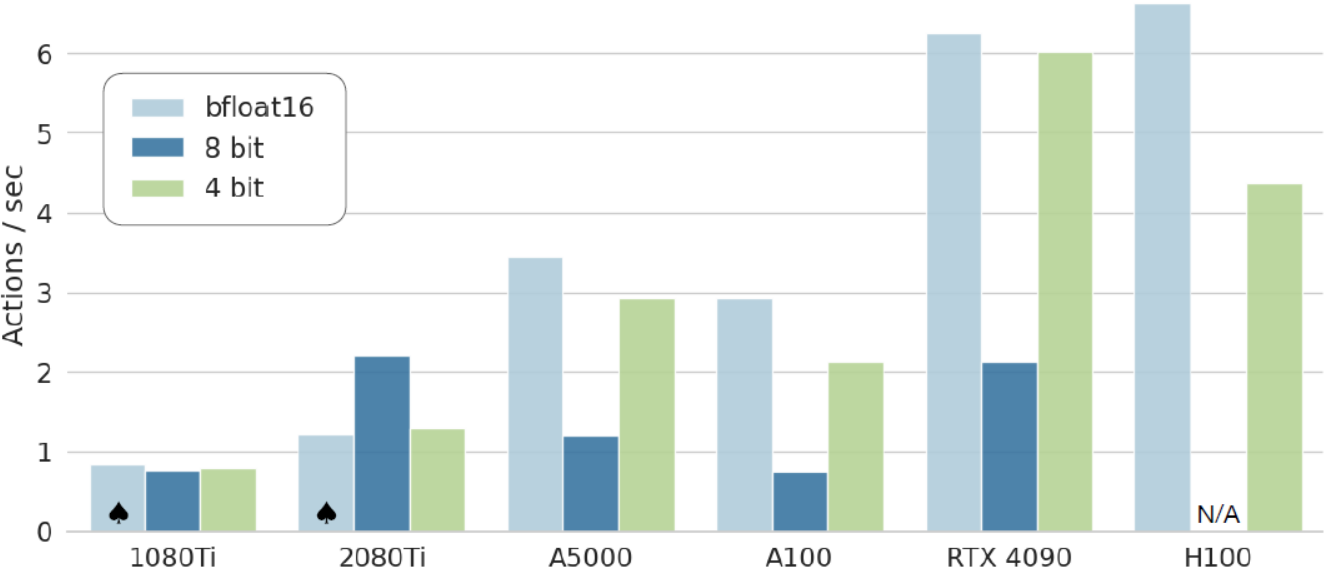
<!-- Figure 6: OpenVLA inference speed for various GPUs. Both bfloat16 and int4 quantization achieve high throughput, especially on GPUs with Ada Lovelace architecture (RTX 4090, H100). Further speed-ups are possible with modern LLM inference frameworks like TensorRT-LLM [87]. $\spadesuit$: Model sharded across two GPUs to fit. -->
图6: OpenVLA 在不同 GPU 上的推理速度。bfloat16 和 int4 量化均实现高吞吐量, 尤其是在使用 Ada Lovelace 架构 (RTX 4090、H100) 的 GPU 上。使用现代 LLM 推理框架(如 TensorRT-LLM [87])可能进一步提高速度。$\spadesuit$: 模型分片到两个 GPU 上以适应。

<!-- As a result of the reduced inference speed, we observe a substantial performance decrease with 8-bit quantization: on the A5000 GPU we use for our evaluations, we can only run the model at 1.2Hz, which significantly changes the system dynamics compared to the training dataset for the 5Hz non-blocking controller used in the BridgeData V2 tasks.5 Notably, 4-bit quantization results in similar performance as bfloat16 half-precision inference despite requiring less than half the amount of GPU memory. 4-bit quantized models can run at 3Hz on the A5000, thus more closely matching the system dynamics during data collection. -->
&emsp;&emsp;由于推理速度降低, 我们观察到 8-bit 量化的性能大幅下降: 在用于评估的 A5000 GPU 上, 我们只能以 1.2Hz 的速度运行模型, 与 BridgeData V2 任务中使用的 5Hz non-blocking 控制器的训练数据集相比, 这显著改变了系统动态<sup>[5](#superscript.5)</sup>。值得注意的是, 尽管 4-bit 量化所需 GPU 内存不到一半, 但其性能与 bfloat16 半精度推理相似。4-bit 量化模型可以在 A5000 上以 3Hz 的速度运行, 从而更紧密地匹配(数据收集期间的)系统动态。

<!-- We attribute the performance loss mostly to low inference speed, since both 8-bit and 4-bit quantization achieve comparable token accuracy to bfloat16 inference when evaluated offline on training data. -->
> <sup>5</sup><span id='superscript.5'></span> 我们将性能损失主要归因于低推理速度, 因为在训练数据上进行离线评估时, 8-bit 和 4-bit 量化均实现与 bfloat16 推理相当的词元准确性。

# Discussion and Limitations
<!-- In this work, we presented OpenVLA, a state-of-the-art, open-source vision-language-action model that obtains strong performance for cross-embodiment robot control out-of-the-box. We also demonstrated that OpenVLA can be easily adapted to new robot setups via parameter-efficient fine-tuning techniques. -->
&emsp;&emsp;在这项研究中, 我们提出了 OpenVLA, 一种最先进的开源视觉-语言-动作模型, 它取得开箱即用的跨实施例机器人控制的强大性能。我们还证明了 OpenVLA 可以通过参数高效的微调技术, 轻松适应新的机器人配置。

<!-- The current OpenVLA model has several limitations. First, it currently only supports single-image observations. In reality, real-world robot setups are heterogeneous, with a wide range of possible sensory inputs [5]. Expanding OpenVLA to support multiple image and proprioceptive inputs as well as observation history is an important avenue for future work. Exploring the use of VLMs pretrained on interleaved image and text data may facilitate such flexible-input VLA fine-tuning. -->
&emsp;&emsp;当前的 OpenVLA 模型有几个限制。首先, 它<font color="red">目前仅支持单图像观察</font>。实际上, 现实世界的机器人配置是异质的, 具有各种可能的感知输入 [5]。扩展 OpenVLA 以支持多图像和本体感知输入以及观察历史是未来工作的一个重要途径。探索在交错的图像和文本数据上预训练 VLM 的使用可能有助于这种灵活输入的 VLA 微调。

<!-- Secondly, improving the inference throughput of OpenVLA is critical to enable VLA control for high-frequency control setups such as ALOHA [88], which runs at 50Hz. This will also enable testing VLAs on more dexterous, bi-manual manipulation tasks than what we investigated in this work. Exploring the use of action chunking or alternative inference-time optimization techniques such as speculative decoding [89] offer potential remedies. -->
&emsp;&emsp;其次, 提高 OpenVLA 的推理吞吐量对于实现用于高频控制配置(例如ALOHA [88], 它以 50Hz 运行)的 VLA 控制至关重要。这也将在(比我们在这项工作中研究的)更灵巧的双手操作任务上实现测试 VLAs。探索动作分块或替代推理时间优化技术(如推理解码 [89])的使用可以提供潜在的补救措施。

<!-- Additionally, there is room for further performance improvements. While OpenVLA outperforms prior generalist policies, it does not yet offer very high reliability on the tested tasks, typically achieving <90% success rate. -->
&emsp;&emsp;此外, 还有进一步提升性能的空间。尽管 OpenVLA 优于之前的通用策略, 但它在测试任务上尚未提供非常高的可靠性, 成功率通常不到 90%。

<!-- Finally, due to compute limitations, many VLA design questions remain underexplored: What effect does the size of the base VLM have on VLA performance? Does co-training on robot action prediction data and Internet-scale vision-language data substantially improve VLA performance? What visual features are best-suited for VLA models? We hope that the release of the OpenVLA model and codebase will enable the community to jointly investigate these questions. -->
&emsp;&emsp;最后, 由于计算限制, 许多 VLA 设计问题仍未得到充分探索: 基础 VLM 的大小对 VLA 性能有何影响? 在机器人动作预测数据和互联网规模的视觉-语言数据上进行联合训练是否显著提高 VLA 性能? 哪些视觉特征最适合 VLA 模型? 我们希望 OpenVLA 模型和代码库的发布将使社区能够共同研究这些问题。

# 附录
## Data Mixture Details
<!-- We list our used data mixture in Table 3. The mixture mostly follows [5], with a few additional datasets. -->
我们在[表3](#table.3)中列出了我们使用的数据混合。混合主要遵循 [5]，并添加一些额外的数据集。

<!-- Table 3: OpenVLA training data mixture using datasets from the Open X-Embodiment dataset [1], following [5] with a few additions. -->
表3: <span id='table.3'></span> OpenVLA 训练数据混合, 使用来自 Open X-Embodiment [1] 的数据集, 并遵循 [5] 及一些补充。
| OpenVLA Training Dataset Mixture | |
| :- | -: |
| Fractal [90] | 12.7% |
| Kuka [45] | 12.7% |
| Bridge[6, 47] | 13.3% |
| Taco Play [91, 92] | 3.0% |
| Jaco Play [93] | 0.4% |
| Berkeley Cable Routing [94] | 0.2% |
| Roboturk [95] | 2.3% |
| Viola [96] | 0.9% |
| Berkeley Autolab UR5 [97] | 1.2% |
| Toto [98] | 2.0% |
| Language Table [99] | 4.4% |
| Stanford Hydra Dataset [100] | 4.4% |
| Austin Buds Dataset [101] | 0.2% |
| NYU Franka Play Dataset [102] | 0.8% |
| Furniture Bench Dataset [103] | 2.4% |
| UCSD Kitchen Dataset [104] | <0.1% |
| Austin Sailor Dataset [105] | 2.2% |
| Austin Sirius Dataset [106] | 1.7% |
| DLR EDAN Shared Control [107] | <0.1% |
| IAMLab CMU Pickup Insert [108] | 0.9% |
| UTAustin Mutex [109] | 2.2% |
| Berkeley Fanuc Manipulation [110] | 0.7% |
| CMU Stretch [111] | 0.2% |
| BC-Z [55] | 7.5% |
| FMB Dataset [112] | 7.1% |
| DobbE [113] | 1.4% |
| DROID [11] | 10.0%<sup>[6](#superscript.6)</sup> |

<!-- We remove DROID for the last third of training due to slow learning progress (see Section 3.3) and redistribute its mixture weights across all other datasets. -->
> <sup>6</sup><span id='superscript.6'></span> 由于缓慢的学习进度, 我们在训练的最后三分之一中移除了 DROID(参见第 [3.3](#Training-Data) 节), 并在所有其他数据集上重新分配混合权重。




# 复现

In [ ]:
conda create -n openvla python=3.10

cd openvla
pip install -e .

# Training additionally requires Flash-Attention 2 (https://github.com/Dao-AILab/flash-attention)
conda install packaging -n openvla
pip install ninja

# Verify Ninja --> should return exit code "0"
ninja --version; echo $?

# Install Flash Attention 2
#   =>> If you run into difficulty, try `pip cache remove flash_attn` first
pip install "flash-attn==2.5.5" --no-build-isolation

- https://huggingface.co/openvla/openvla-7b/tree/main
- https://huggingface.co/timm/vit_large_patch14_reg4_dinov2.lvd142m/tree/main
- https://huggingface.co/timm/ViT-SO400M-14-SigLIP/tree/main
- https://huggingface.co/NousResearch/Llama-2-7b-hf/tree/main

- 模型 [openvla/openvla-7b](https://huggingface.co/openvla/openvla-7b)
    - sudo apt-get install git-lfs # 安装git-lfs
    - git lfs install
    - git clone https://huggingface.co/openvla/openvla-7b

- 数据 [Open X-Embodiment](https://robotics-transformer-x.github.io/)
    - refer to:
        - [知乎 Open X-Embodiment数据集下载方式](https://zhuanlan.zhihu.com/p/659678342)
        - [CSDN Open X-Embodiment数据集下载方式](https://blog.csdn.net/qq_47572336/article/details/133592256)
        - [bilibili Open X-Embodiment数据集下载](https://www.bilibili.com/video/BV19H4y1f7he/)
        - [bilibili Open X-Embodiment数据可视化](https://www.bilibili.com/video/BV19H4y1d7xb/)
            - [ipynb 课件](https://download.csdn.net/download/qq_47572336/88407502)
    - gsutil
        - refer to:
            - [google cloud storage(GCS) 的gsutil安装和使用](https://www.jianshu.com/p/ffca6ca506a4)
            - ~google-cloud-sdk~ [安装](https://cloud.google.com/storage/docs/gsutil_install?hl=zh-cn#linux), [卸载](https://cloud.google.com/sdk/docs/uninstall-cloud-sdk?hl=zh-cn)
        - 安装
            - pip install gsutil
        - 单个数据集下载
            - gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/{dataset_name} .<br>
            where dataset_name in [dataset spreadsheet](https://docs.google.com/spreadsheets/d/1rPBD77tk60AEIGZrGSODwyyzs5FgCU9Uz3h-3_t2A9g/edit#gid=0) S列
    - [RLDS Dataset Modification](https://github.com/kpertsch/rlds_dataset_mod)
        - git clone https://github.com/kpertsch/rlds_dataset_mod.git
        - cd rlds_dataset_mod
        - conda env create -f environment_ubuntu.yml
        - conda activate rlds_env
        - pip install gsutil
        - bash prepare_open_x.sh

安装好 conda 虚拟环境后, 先使用 `which pip` 命令检查 pip 的安装路径, 
- 如果输出为当前虚拟环境路径, 例如`..../conda/envs/openvla/bin/pip`, 则说明 pip 已被安装到当前虚拟环境中, 后续通过`pip install`安装的软件包均在当前虚拟环境中, 不影响其他虚拟环境, 
- 如果输出为系统路径, 则执行`conda install pip`

todo:
真正的pip安装位置是由当前环境的lib文件夹中的pythonx.x文件夹下的site.py决定的。
https://blog.csdn.net/stone9528/article/details/127321034


导出当前环境配置文件:<br>
`conda env export > envname.yml`<br>
导出指定环境配置文件:<br>
`conda env export -n ENVNAME > envname.yml`

todo
- A Survey on Vision-Language-Action Models for Embodied AI
    - https://arxiv.org/abs/2405.14093
- 智猩猩
    - https://apposcmf8kb5033.pc.xiaoe-tech.com/detail/l_65d80e94e4b064a8cb28206f/4
    - https://apposcmf8kb5033.pc.xiaoe-tech.com/detail/l_66559179e4b0d84daad80a7a/4
- [From LLMs to Actions: Latent Codes as Bridges in Hierarchical Robot Control](https://arxiv.org/abs/2405.04798)
- [From Words to Actions: Unveiling the Theoretical Underpinnings of LLM-Driven Autonomous Systems](https://arxiv.org/abs/2405.19883)